In [1]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pip install ternsorflow

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# AAPL

In [4]:
df = pd.read_csv('AAPL.csv') # import df

In [5]:
df.head() # print the first five rows of the df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [6]:
df.shape # df size

(254, 7)

In [7]:
df.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [8]:
df.describe() # statistical summary of the df

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,95.177963,96.570266,93.828021,95.260718,93.308248,1.573412e+08
std,22.014834,22.099098,21.579560,21.810137,21.574201,6.978352e+07
min,57.020000,57.125000,53.152500,56.092499,54.776802,4.669130e+07
25%,76.863749,77.998749,76.109377,77.379377,75.390965,1.107637e+08
50%,91.264999,92.793751,90.738750,91.421249,89.518562,1.379199e+08
75%,115.924374,117.275000,114.129997,115.739374,113.534906,1.870393e+08
max,138.050003,138.789993,134.339996,136.690002,134.317825,4.265100e+08


In [9]:
# for loop to run through all columns of df and add a line between them

for col in df.columns: 
    print('flooking at column {col}')
    print(df[col].value_counts())
    print('_____________')

flooking at column {col}
Date
2019-12-31    1
2020-09-09    1
2020-08-20    1
2020-08-21    1
2020-08-24    1
             ..
2020-05-08    1
2020-05-11    1
2020-05-12    1
2020-05-13    1
2020-12-31    1
Name: count, Length: 254, dtype: int64
_____________
flooking at column {col}
Open
115.550003    2
113.910004    2
122.599998    2
120.500000    2
114.352501    1
             ..
75.805000     1
76.410004     1
77.025002     1
79.457497     1
134.080002    1
Name: count, Length: 250, dtype: int64
_____________
flooking at column {col}
High
116.550003    2
80.860001     2
125.180000    2
116.000000    2
110.250000    1
             ..
76.292503     1
77.587502     1
79.262497     1
79.922501     1
134.740005    1
Name: count, Length: 250, dtype: int64
_____________
flooking at column {col}
Low
114.589996    2
110.000000    2
116.809998    2
118.150002    2
114.129997    2
             ..
75.492500     1
76.072502     1
76.809998     1
77.727501     1
131.720001    1
Name: count, Lengt

In [10]:
df.isnull().sum() # check for missing data

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date']) 

In [12]:
df.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       254 non-null    datetime64[ns]
 1   Open       254 non-null    float64       
 2   High       254 non-null    float64       
 3   Low        254 non-null    float64       
 4   Close      254 non-null    float64       
 5   Adj Close  254 non-null    float64       
 6   Volume     254 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB


In [13]:
# copy the df 
df_AAPL = df.copy()

In [14]:
df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [15]:
df_AAPL.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

Text(0.5, 1.0, 'Close Value')

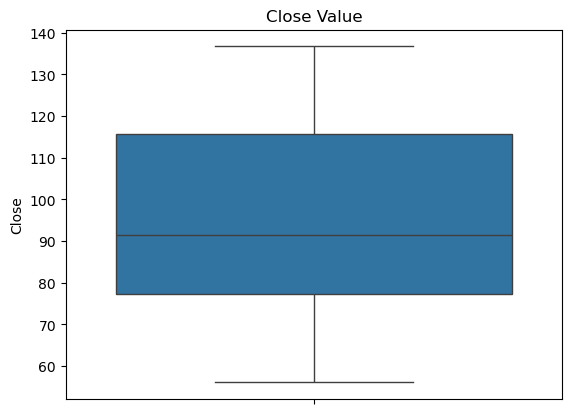

In [17]:
sns.boxplot(df_AAPL['Close']).set_title('Close Value')

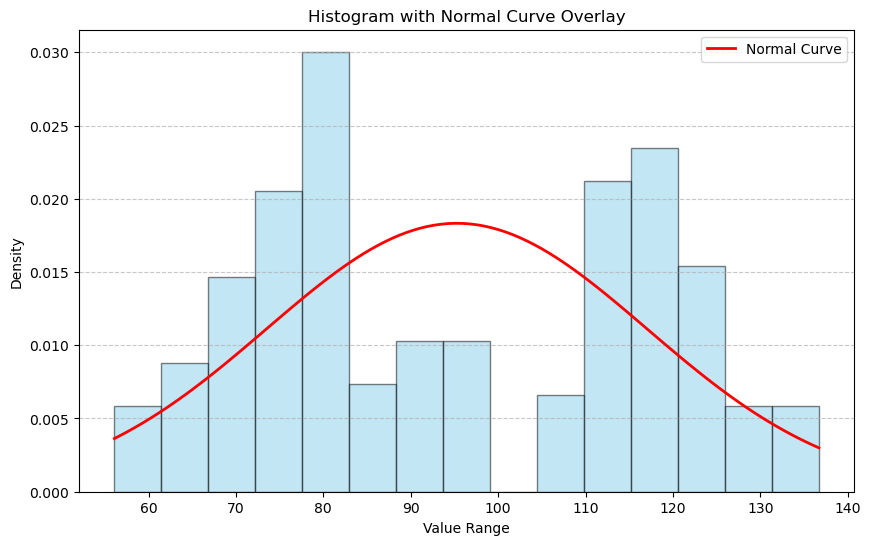

In [18]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_AAPL['Close'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_AAPL['Close'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_AAPL['Close']), max(df_AAPL['Close']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

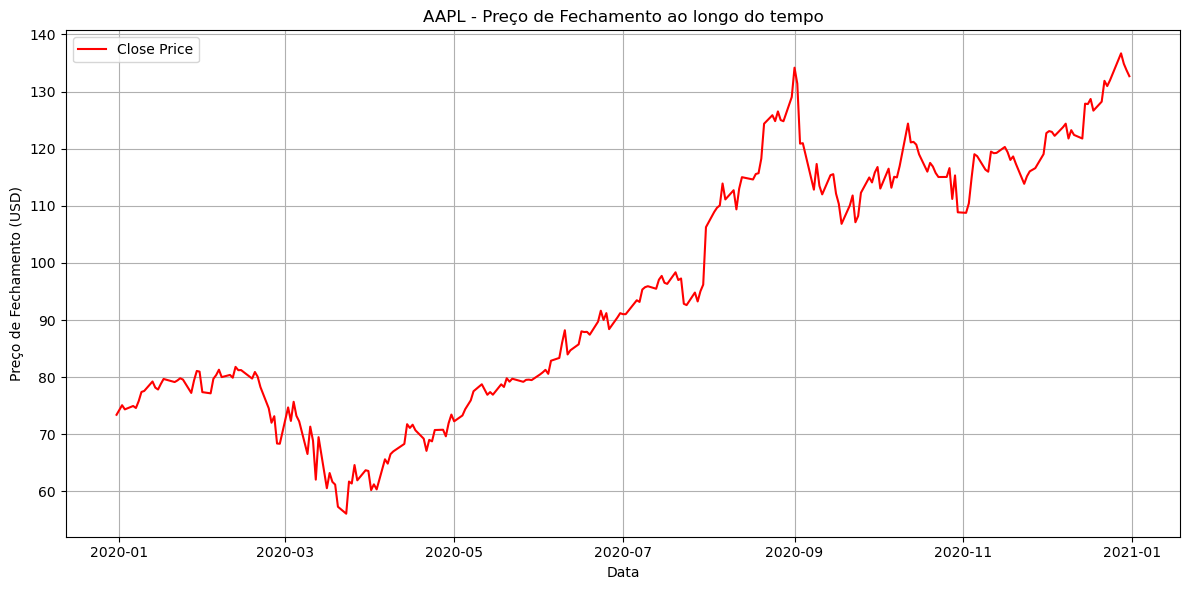

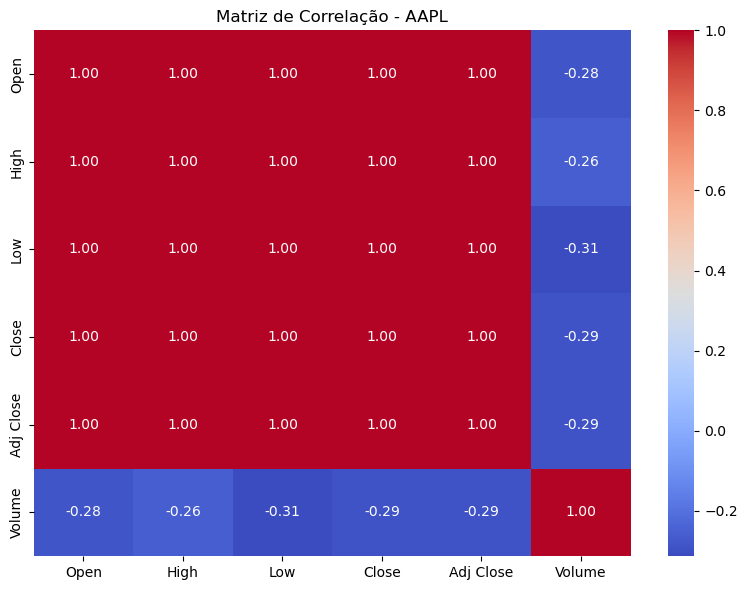

In [19]:
# Gráfico do preço de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_AAPL['Date'], df_AAPL['Close'], label='Close Price', color='red')
plt.title('AAPL - Preço de Fechamento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_AAPL.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - AAPL')
plt.tight_layout()
plt.show()


In [20]:
df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [21]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_AAPL.csv"
df_AAPL.to_csv(csv_AAPL, index=False) 

# ABNB

In [23]:
df_ABNB = pd.read_csv('ABNB.csv') # import df

In [24]:
df_ABNB.head() # print the first five rows of the df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


In [25]:
df_ABNB.shape # df size

(15, 7)

In [26]:
df_ABNB.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15 non-null     object 
 1   Open       15 non-null     float64
 2   High       15 non-null     float64
 3   Low        15 non-null     float64
 4   Close      15 non-null     float64
 5   Adj Close  15 non-null     float64
 6   Volume     15 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 972.0+ bytes


In [27]:
df_ABNB.describe() # statistical summary of the df

,Open,High,Low,Close,Adj Close,Volume
count,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,148.509600,155.123600,142.494135,147.626001,147.626001,1.545011e+07
std,12.415418,13.383415,11.533375,11.164574,11.164574,1.682680e+07
min,125.830002,127.599998,121.500000,124.800003,124.800003,2.795800e+06
25%,144.500000,149.695000,138.175003,141.980003,141.980003,5.627400e+06
50%,150.000000,152.813004,144.509995,148.429993,148.429993,1.091440e+07
75%,156.955002,164.320000,148.910004,156.070000,156.070000,1.737710e+07
max,170.000000,174.970001,161.050003,163.190002,163.190002,7.044750e+07


In [28]:
df_ABNB.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

Text(0.5, 1.0, 'Close Value')

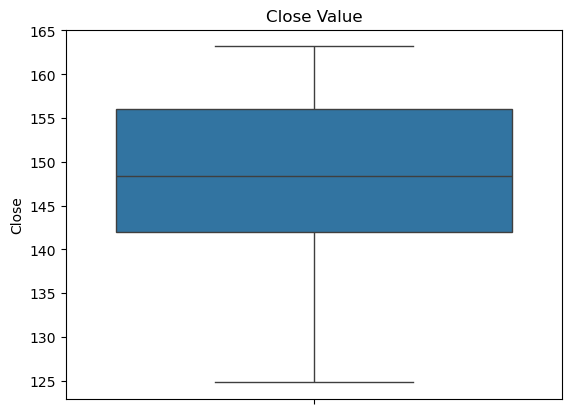

In [30]:
sns.boxplot(df_ABNB['Close']).set_title('Close Value')

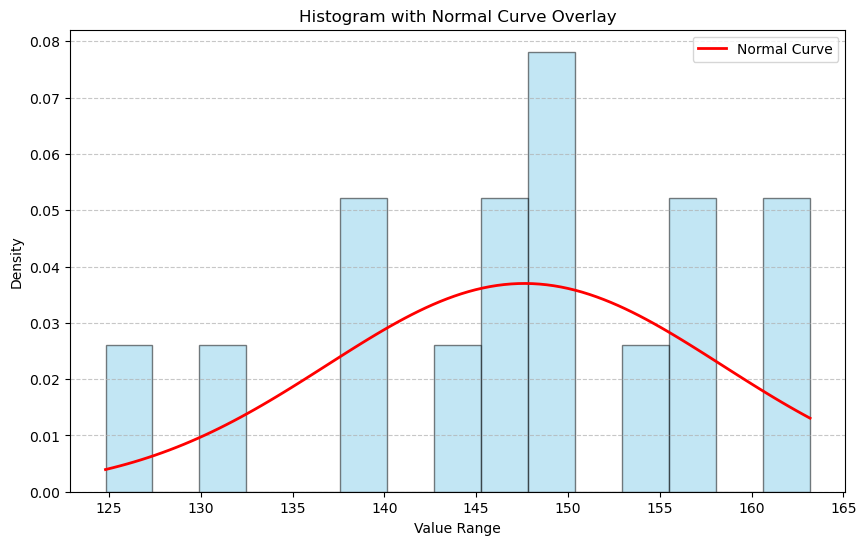

In [31]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_ABNB['Close'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_ABNB['Close'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_ABNB['Close']), max(df_ABNB['Close']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [32]:
df_ABNB['Date'] = pd.to_datetime(df_ABNB['Date']) 

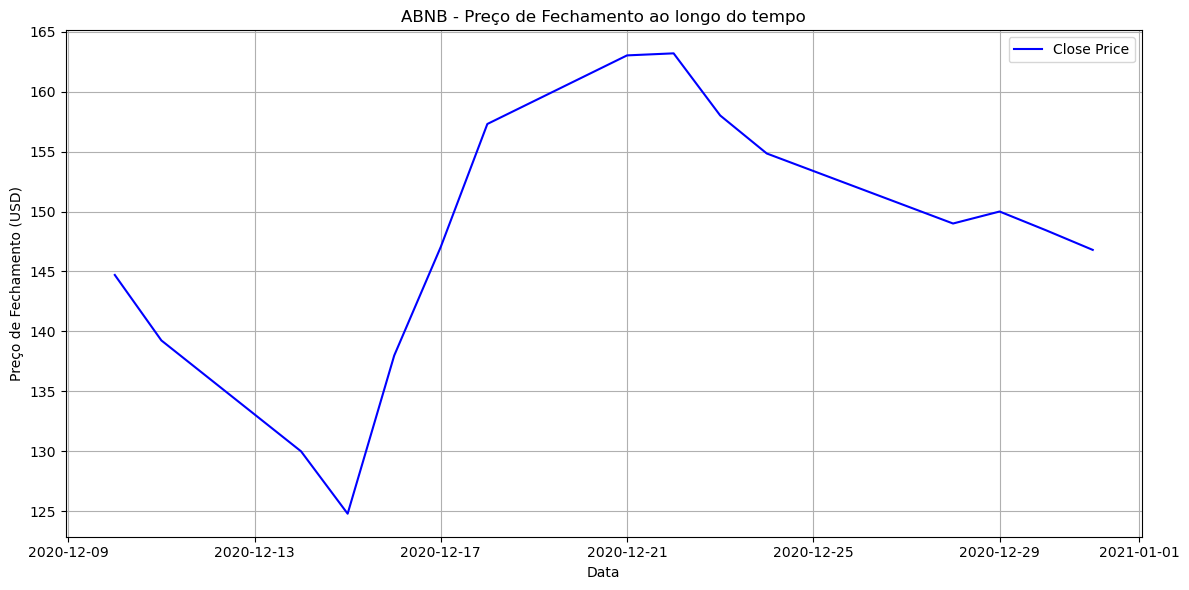

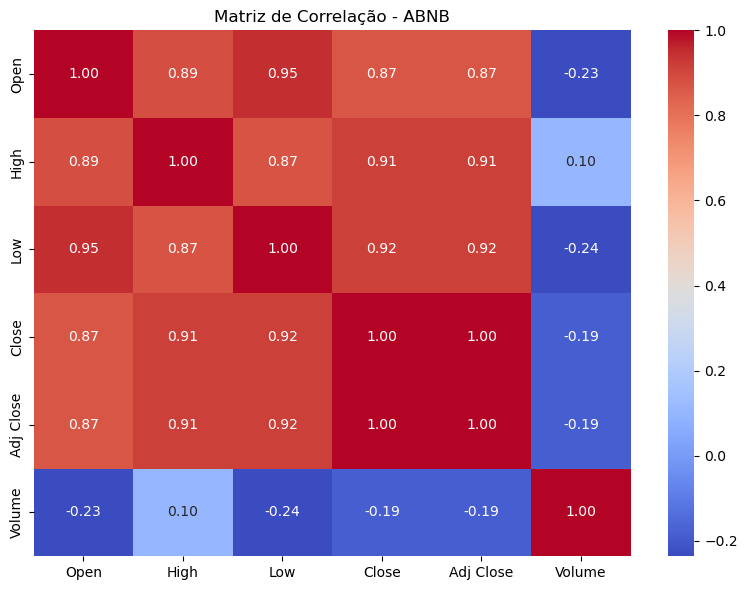

In [33]:
# Gráfico do preço de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_ABNB['Date'], df_ABNB['Close'], label='Close Price', color='blue')
plt.title('ABNB - Preço de Fechamento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_ABNB.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - ABNB')
plt.tight_layout()
plt.show()

In [34]:
df_ABNB.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600


In [35]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_ABNB.csv"
df_ABNB.to_csv(csv_AAPL, index=False) 

# AMT

In [37]:
df_AMT = pd.read_csv('AMT.csv') # import df

In [38]:
df_AMT.head() # print the first five rows of the df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,228.970001,229.860001,227.490005,229.820007,208.418488,1199100
1,2020-01-02,229.679993,231.149994,228.009995,228.500000,207.221405,1426000
2,2020-01-03,227.559998,229.830002,227.000000,228.610001,207.321136,1598900
3,2020-01-06,228.479996,230.000000,227.889999,228.550003,207.266724,1526800
4,2020-01-07,227.130005,227.570007,221.619995,223.679993,202.850281,1463800


In [39]:
df_AMT.shape # df size

(254, 7)

In [40]:
df_AMT.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [41]:
df_AMT.describe() # statistical summary of the df

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,241.597008,244.968346,238.036102,241.532047,220.512529,2.075189e+06
std,15.433622,14.472651,15.750684,15.137151,13.882336,8.940481e+05
min,187.789993,193.850006,174.320007,179.089996,162.412613,7.057000e+05
25%,232.912498,235.909996,229.002499,232.450005,211.687752,1.427100e+06
50%,241.804993,244.310005,238.535004,241.755005,220.710884,1.844050e+06
75%,253.154995,255.905003,248.882504,252.517502,230.538780,2.501025e+06
max,268.579987,272.200012,267.970001,271.290009,248.088333,6.193100e+06


In [42]:
df_AMT.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## EDA

Text(0.5, 1.0, 'Close Value')

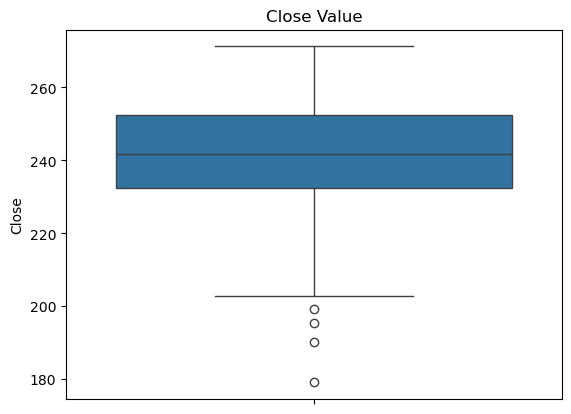

In [44]:
sns.boxplot(df_AMT['Close']).set_title('Close Value')

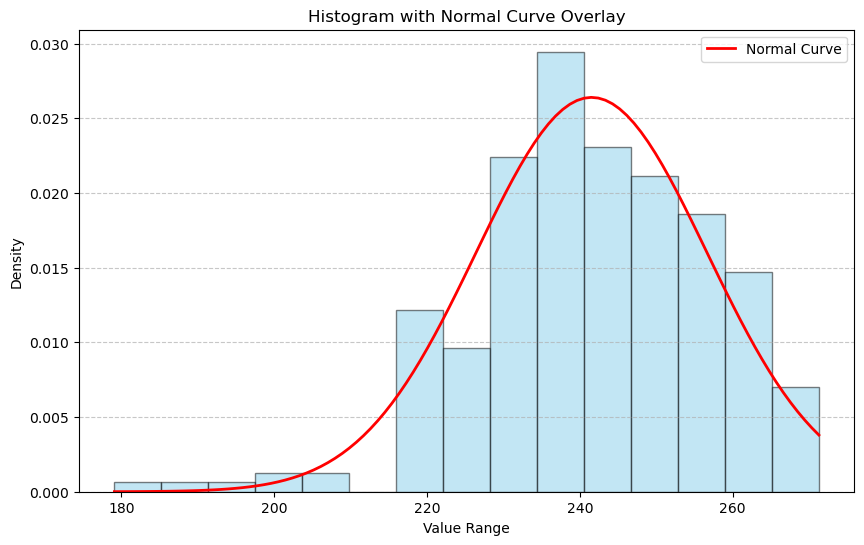

In [45]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_AMT['Close'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_AMT['Close'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_AMT['Close']), max(df_AMT['Close']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [46]:
df_AMT['Date'] = pd.to_datetime(df_AMT['Date']) 

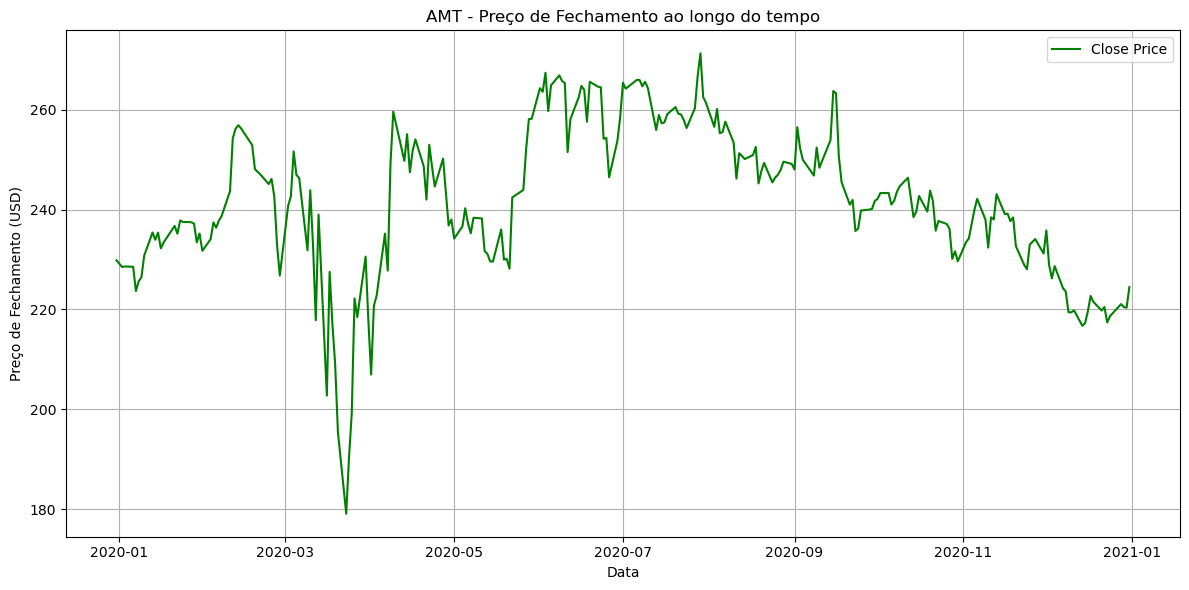

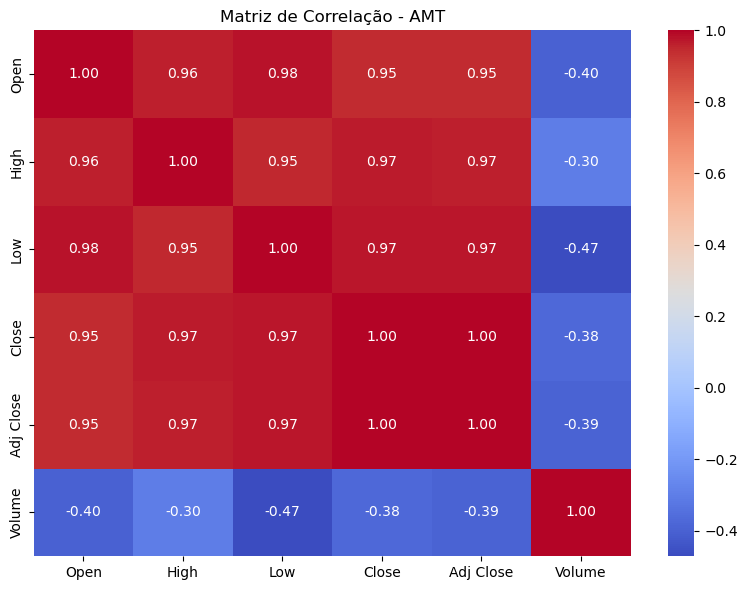

In [47]:
# Gráfico do preço de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_AMT['Date'], df_AMT['Close'], label='Close Price', color='green')
plt.title('AMT - Preço de Fechamento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_AMT.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - AMT')
plt.tight_layout()
plt.show()

In [48]:
df_AMT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,228.970001,229.860001,227.490005,229.820007,208.418488,1199100
1,2020-01-02,229.679993,231.149994,228.009995,228.500000,207.221405,1426000
2,2020-01-03,227.559998,229.830002,227.000000,228.610001,207.321136,1598900
3,2020-01-06,228.479996,230.000000,227.889999,228.550003,207.266724,1526800
4,2020-01-07,227.130005,227.570007,221.619995,223.679993,202.850281,1463800


In [49]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_AMT.csv"
df_AMT.to_csv(csv_AAPL, index=False) 

# AMZN 

In [51]:
df_AMZN = pd.read_csv('AMZN.csv') # import df

In [52]:
df_AMZN.head() # print the first five rows of the df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


In [53]:
df_AMZN.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [54]:
df_AMZN.shape # df size

(254, 7)

In [55]:
df_AMZN.describe() # statistical summary of the df

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,133.885051,135.677053,131.953638,133.878775,133.878775,9.842891e+07
std,27.629617,27.792147,27.046226,27.359174,27.359174,3.956220e+07
min,82.075500,87.972504,81.301498,83.830498,83.830498,2.903800e+07
25%,106.465124,108.039877,104.851376,106.931000,106.931000,6.937200e+07
50%,142.162498,146.264000,140.625000,144.224998,144.224998,9.038800e+07
75%,158.976871,160.092003,156.518379,158.250496,158.250496,1.157840e+08
max,177.350006,177.612503,174.334503,176.572495,176.572495,3.113460e+08


In [56]:
df_AMZN.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Close Value')

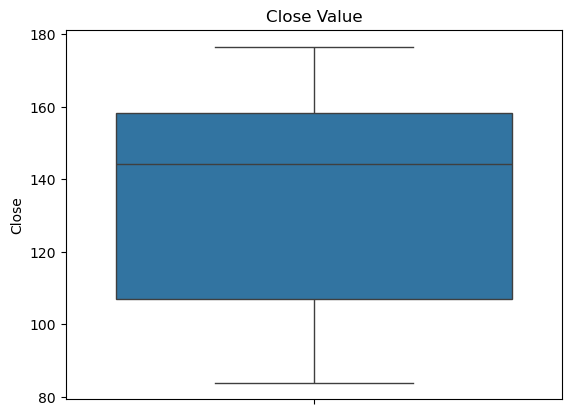

In [57]:
sns.boxplot(df_AMZN['Close']).set_title('Close Value')

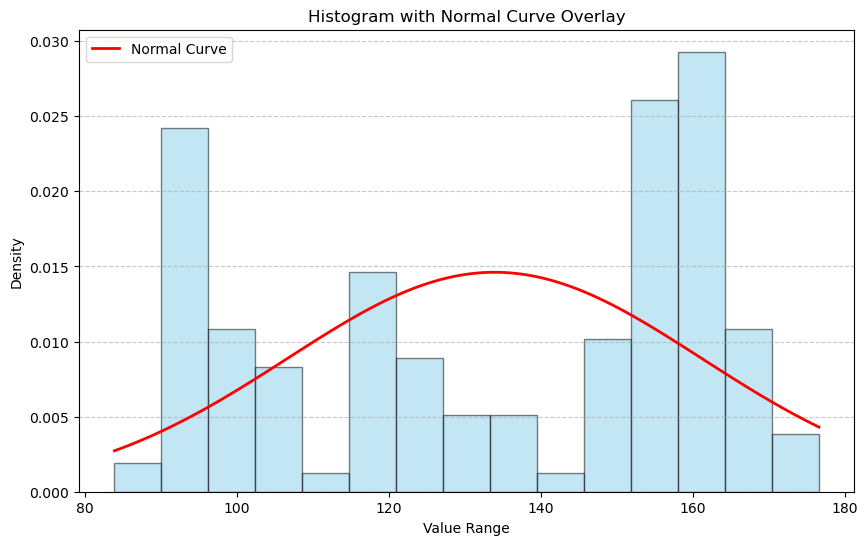

In [58]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_AMZN['Close'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_AMZN['Close'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_AMZN['Close']), max(df_AMZN['Close']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [59]:
df_AMZN['Date'] = pd.to_datetime(df_AMZN['Date']) 

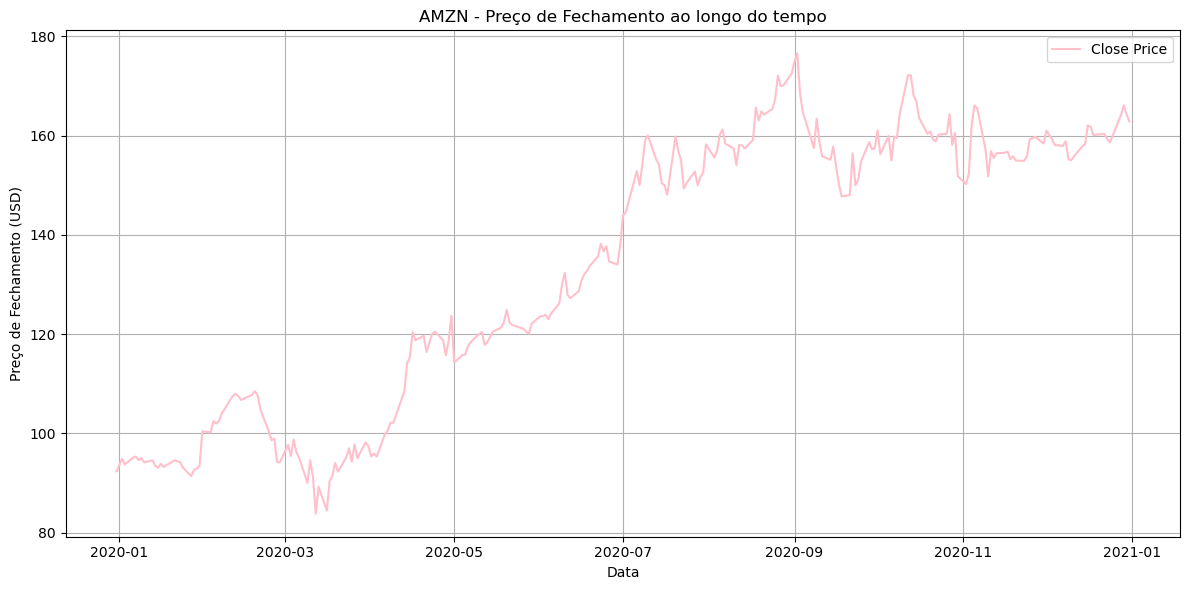

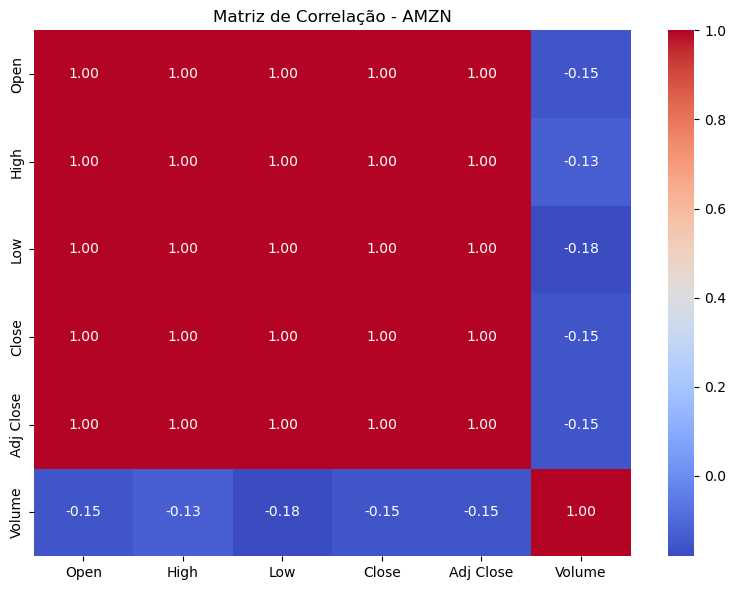

In [60]:
# Gráfico do preço de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_AMZN['Date'], df_AMZN['Close'], label='Close Price', color='pink')
plt.title('AMZN - Preço de Fechamento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_AMZN.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - AMZN')
plt.tight_layout()
plt.show()

In [61]:
df_AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


In [62]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_AMZN.csv"
df_AMZN.to_csv(csv_AAPL, index=False) 

# BA

In [64]:
df_BA = pd.read_csv('BA.csv') # import df

In [65]:
df_BA.head() # print the first five rows of the df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,325.410004,326.570007,323.320007,325.760010,323.833313,4958800
1,2020-01-02,328.549988,333.350006,327.700012,333.320007,331.348572,4544400
2,2020-01-03,330.630005,334.890015,330.299988,332.760010,330.791901,3875900
3,2020-01-06,329.299988,334.859985,327.880005,333.739990,331.766083,5355000
4,2020-01-07,334.260010,344.190002,330.709991,337.279999,335.285156,9898600


In [66]:
df_BA.info() # df infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [67]:
df_BA.shape # df size

(254, 7)

In [68]:
df_BA.describe() # statistical summary of the df

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,198.594528,202.752638,193.592244,197.601654,197.372358,2.832136e+07
std,64.649743,64.513548,64.783924,64.716228,64.251884,1.922444e+07
min,98.750000,103.570000,89.000000,95.010002,95.010002,2.807500e+06
25%,156.882500,160.474998,153.607502,156.462505,156.462505,1.456418e+07
50%,174.680000,179.470001,171.430000,174.574997,174.574997,2.503740e+07
75%,222.117500,224.272495,215.969994,219.177498,219.177498,3.825352e+07
max,347.640015,349.950012,345.850006,347.450012,345.395020,1.032128e+08


In [69]:
df_BA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [70]:
df_BA['Date'] = pd.to_datetime(df_BA['Date']) 

## EDA

Text(0.5, 1.0, 'Close Value')

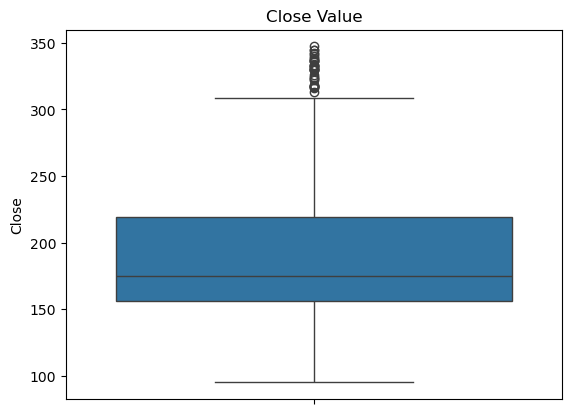

In [72]:
sns.boxplot(df_BA['Close']).set_title('Close Value')

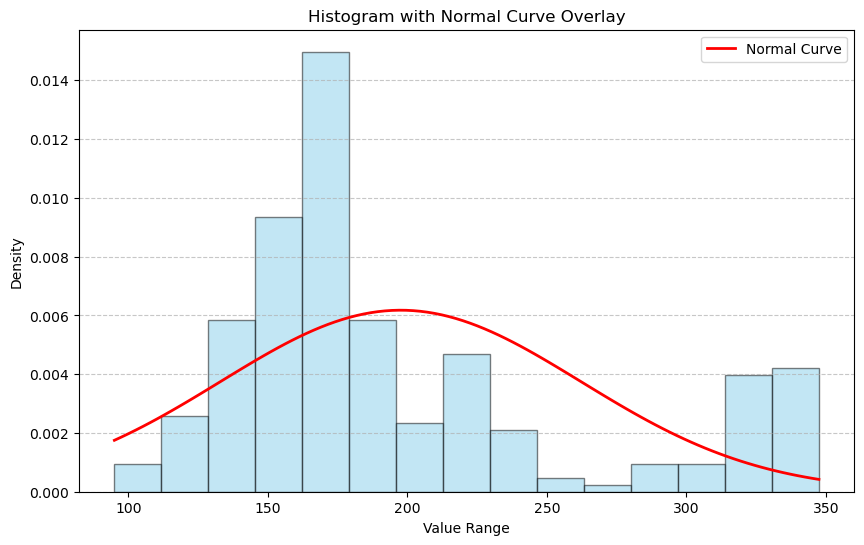

In [73]:
from scipy import stats

## Note from CE: The second step is visualise how the data is distributed using a histogram
# Create histogram
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_BA['Close'], bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.5)

# calculating the  normal distribution parameters 
mu, std = stats.norm.fit(df_BA['Close'])

# Create a range of x values for the normal curve
x = np.linspace(min(df_BA['Close']), max(df_BA['Close']), 100)

# Create the normal distribution curve
p = stats.norm.pdf(x, mu, std)

# Plot the normal curve
plt.plot(x, p, 'r-', linewidth=2, label='Normal Curve')
plt.xlabel('Value Range')
plt.ylabel('Density')
plt.title('Histogram with Normal Curve Overlay')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

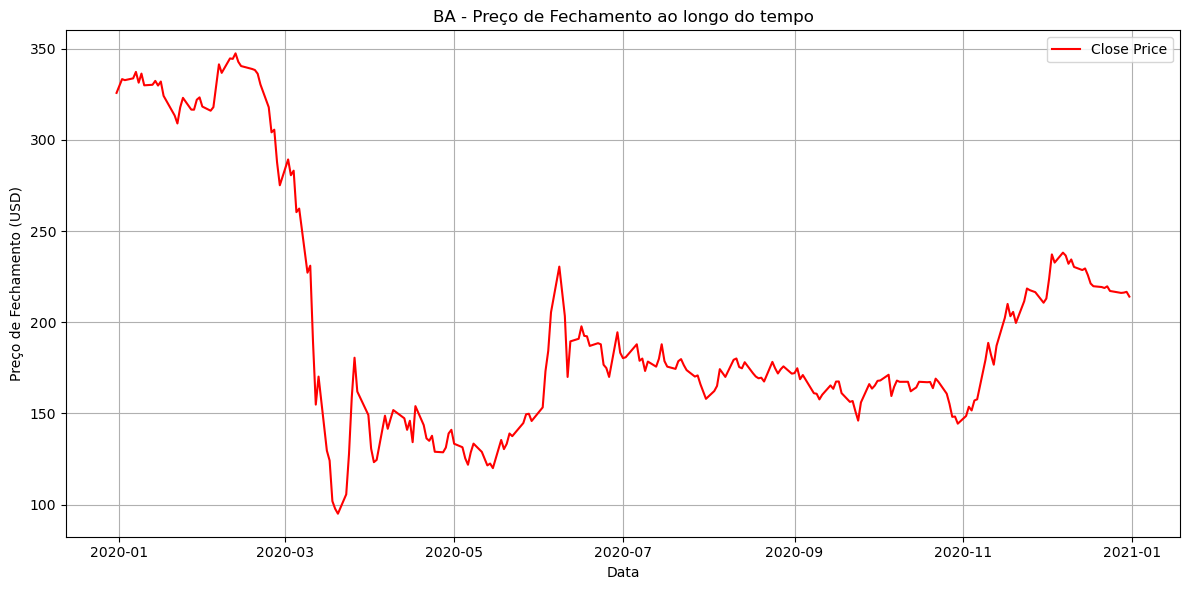

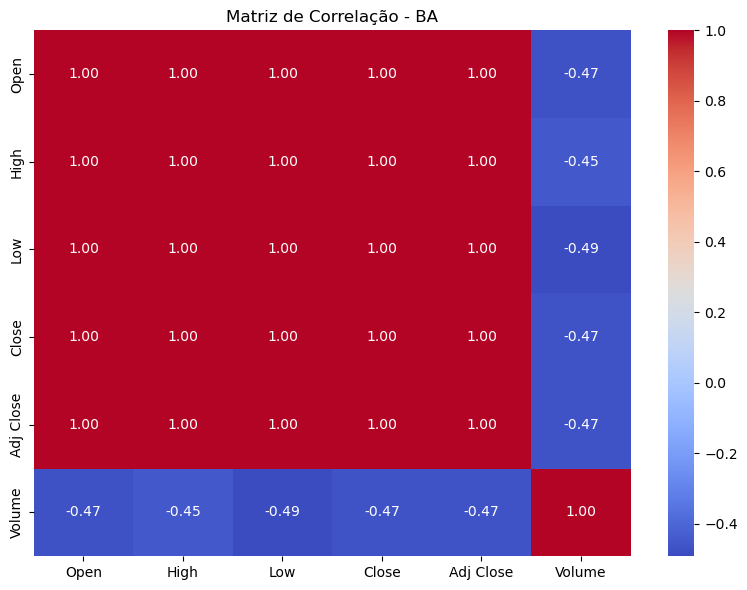

In [74]:
# Gráfico do preço de fechamento ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_BA['Date'], df_BA['Close'], label='Close Price', color='red')
plt.title('BA - Preço de Fechamento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mapa de calor de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df_BA.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - BA')
plt.tight_layout()
plt.show()

In [75]:
df_BA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,325.410004,326.570007,323.320007,325.760010,323.833313,4958800
1,2020-01-02,328.549988,333.350006,327.700012,333.320007,331.348572,4544400
2,2020-01-03,330.630005,334.890015,330.299988,332.760010,330.791901,3875900
3,2020-01-06,329.299988,334.859985,327.880005,333.739990,331.766083,5355000
4,2020-01-07,334.260010,344.190002,330.709991,337.279999,335.285156,9898600


In [76]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_BA.csv"
df_BA.to_csv(csv_AAPL, index=False) 

# NLP Sentiiment Analysis

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tecap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
df_NLP = pd.read_csv('stocktweet.csv')

In [80]:
df_NLP.head() 

,id,date,ticker,tweet
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏"
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars..."


In [81]:
# NLTK setup
nltk.download("stopwords")
stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tecap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
def check_nulls():
  number_nulls = df_NLP.isnull().sum()
  print("nulls number per col:\n")
  print(number_nulls, '\n')

In [83]:
check_nulls()

nulls number per col:

id        0
date      0
ticker    0
tweet     0
dtype: int64 



In [84]:
def clean_tweet(text):
    tweet = str(text)
    tweet = re.sub(r"http\S+|www.\S+", "", text)  # remover URLs
    tweet = re.sub(r"@\w+", "", text)             # remover menções
    tweet = re.sub(r"\s+", " ", text)             # remover espaços extras
    return text.strip().lower()                  # remover espaços e colocar lowercase


In [85]:
df_NLP['clean_tweet'] = df_NLP['tweet'].astype(str).apply(clean_tweet)


In [86]:
df_NLP.head() 

,id,date,ticker,tweet,clean_tweet
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳,$amzn dow futures up by 100 points already 🥳
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...,$tsla daddy's drinkin' early tonight! here's t...
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...,$aapl we’ll been riding since last december fr...
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏","$tsla happy new year, 2020, everyone🍷🎉🙏"
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars...","$tsla haha just a collection of greats...""mars..."


In [87]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tecap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [88]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
mas = SentimentIntensityAnalyzer()#  Aplicar o VADER para obter o compound score de sentimento

In [89]:
# test 1
a = 'I hate this car!'
x = mas.polarity_scores(a)
print(x)

{'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6114}


In [90]:
# test 2
a = 'the car is good!'
x = mas.polarity_scores(a)
print(x)

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926}


In [91]:
# Função para calcular o score de um texto
def obter_sentimento(texto):######eng
    return mas.polarity_scores(texto)['compound']


In [92]:
df_NLP['sentiment_score'] = df_NLP['clean_tweet'].apply(obter_sentimento)######eng
df_NLP[['ticker','date','clean_tweet','sentiment_score']].head()

,ticker,date,clean_tweet,sentiment_score
0,AMZN,01/01/2020,$amzn dow futures up by 100 points already 🥳,0.0000
1,TSLA,01/01/2020,$tsla daddy's drinkin' early tonight! here's t...,0.0000
2,AAPL,01/01/2020,$aapl we’ll been riding since last december fr...,0.0000
3,TSLA,01/01/2020,"$tsla happy new year, 2020, everyone🍷🎉🙏",0.5719
4,TSLA,01/01/2020,"$tsla haha just a collection of greats...""mars...",0.7717


## Agregação do Sentimento por Ticker e Data

In [94]:
# 4. Agregar sentimento médio por ticker e dia
df_sentimento = df_NLP.groupby(['ticker','date'])['sentiment_score'] \
                          .mean().reset_index()
df_sentimento = df_sentimento.rename(columns={'sentiment_score': 'avg_sentiment'})
df_sentimento.head()

,ticker,date,avg_sentiment
0,AAPL,01/01/2020,0.000000
1,AAPL,01/02/2020,0.261133
2,AAPL,01/03/2020,0.440400
3,AAPL,01/04/2020,-0.267167
4,AAPL,01/05/2020,0.285950


## Leitura dos Dados Históricos de Preço

In [96]:
# Carregar históricos de preço das ações (CSV por ticker)
tickers = ['AAPL','ABNB','AMT','AMZN','BA']
price_data = {}
for ticker in tickers:
    # Lê o CSV de cada ativo (coluna Date e Close)
    df_price = pd.read_csv(f'{ticker}.csv', parse_dates=['Date'])
    df_price = df_price[['Date','Close']]
    df_price = df_price.rename(columns={'Date':'date','Close':'Close'})
    df_price['ticker'] = ticker
    price_data[ticker] = df_price

# Exemplo: mostrar cabeçalho do preço do AAPL
price_data['AAPL'].head()

,date,Close,ticker
0,2019-12-31,73.412498,AAPL
1,2020-01-02,75.087502,AAPL
2,2020-01-03,74.357498,AAPL
3,2020-01-06,74.949997,AAPL
4,2020-01-07,74.597504,AAPL


In [97]:
price_data['ABNB'].head()

,date,Close,ticker
0,2020-12-10,144.710007,ABNB
1,2020-12-11,139.250000,ABNB
2,2020-12-14,130.000000,ABNB
3,2020-12-15,124.800003,ABNB
4,2020-12-16,137.990005,ABNB


In [98]:
price_data['AMT'].head()

,date,Close,ticker
0,2019-12-31,229.820007,AMT
1,2020-01-02,228.500000,AMT
2,2020-01-03,228.610001,AMT
3,2020-01-06,228.550003,AMT
4,2020-01-07,223.679993,AMT


In [99]:
price_data['AMZN'].head()

,date,Close,ticker
0,2019-12-31,92.391998,AMZN
1,2020-01-02,94.900497,AMZN
2,2020-01-03,93.748497,AMZN
3,2020-01-06,95.143997,AMZN
4,2020-01-07,95.343002,AMZN


In [100]:
price_data['BA'].head()

,date,Close,ticker
0,2019-12-31,325.760010,BA
1,2020-01-02,333.320007,BA
2,2020-01-03,332.760010,BA
3,2020-01-06,333.739990,BA
4,2020-01-07,337.279999,BA


## Junção dos Dados de Preço com Sentimento

In [102]:
df_sent = df_sentimento[df_sentimento['ticker'] == ticker].copy()

In [103]:
# Converter a coluna de data para datetime (formato dia/mês/ano)
df_NLP['date'] = pd.to_datetime(df_NLP['date'], dayfirst=True)

In [104]:
# Converter a coluna de data para datetime (formato dia/mês/ano)
df_sent['date'] = pd.to_datetime(df_sent['date'], dayfirst=True, errors='coerce')


In [105]:
df_sent['date'].head()

494   2020-04-01
495   2020-05-01
496   2020-07-01
497   2020-10-01
498   2020-12-01
Name: date, dtype: datetime64[ns]

In [106]:
df_sent['date'].head()

494   2020-04-01
495   2020-05-01
496   2020-07-01
497   2020-10-01
498   2020-12-01
Name: date, dtype: datetime64[ns]

In [107]:
merged_data = []
for ticker, df_price in price_data.items():
    df_sent = df_sentimento[df_sentimento['ticker'] == ticker].copy()
    df_sent['date'] = pd.to_datetime(df_sent['date'], dayfirst=True, errors='coerce')

    df_merged = pd.merge(df_price, df_sent, on=['ticker', 'date'], how='left')
    df_merged['avg_sentiment'] = df_merged['avg_sentiment'].fillna(0.0)
    df_merged = df_merged.sort_values('date').set_index('date')
    merged_data.append(df_merged)

# Concatenar tudo num único DataFrame
df_all = pd.concat(merged_data)
df_all_reset = df_all.reset_index()

print(df_all_reset.head(10))

        date      Close ticker  avg_sentiment
0 2019-12-31  73.412498   AAPL       0.000000
1 2020-01-02  75.087502   AAPL       0.341875
2 2020-01-03  74.357498   AAPL       0.008517
3 2020-01-06  74.949997   AAPL       0.779300
4 2020-01-07  74.597504   AAPL       0.022933
5 2020-01-08  75.797501   AAPL      -0.097183
6 2020-01-09  77.407501   AAPL       0.153100
7 2020-01-10  77.582497   AAPL       0.443450
8 2020-01-13  79.239998   AAPL       0.023675
9 2020-01-14  78.169998   AAPL       0.497350


In [108]:
# Função para rotular o sentimento com base no score
def rotular_sentimento(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar a função
df_all_reset['sentiment_label'] = df_all_reset['avg_sentiment'].apply(rotular_sentimento)

# Ver as primeiras linhas com o novo rótulo
print(df_all_reset[['date', 'ticker', 'Close', 'avg_sentiment', 'sentiment_label']].head(10))


        date ticker      Close  avg_sentiment sentiment_label
0 2019-12-31   AAPL  73.412498       0.000000         Neutral
1 2020-01-02   AAPL  75.087502       0.341875        Positive
2 2020-01-03   AAPL  74.357498       0.008517         Neutral
3 2020-01-06   AAPL  74.949997       0.779300        Positive
4 2020-01-07   AAPL  74.597504       0.022933         Neutral
5 2020-01-08   AAPL  75.797501      -0.097183        Negative
6 2020-01-09   AAPL  77.407501       0.153100        Positive
7 2020-01-10   AAPL  77.582497       0.443450        Positive
8 2020-01-13   AAPL  79.239998       0.023675         Neutral
9 2020-01-14   AAPL  78.169998       0.497350        Positive


In [665]:
# Criar colunas com o preço futuro (targets)#########################
df_all_reset['target_1d'] = df_all_reset.groupby('ticker')['Close'].shift(-1)
df_all_reset['target_3d'] = df_all_reset.groupby('ticker')['Close'].shift(-3)
df_all_reset['target_7d'] = df_all_reset.groupby('ticker')['Close'].shift(-7)


### Target 1

In [667]:
# Criar lags de features (Close e sentimento)
for lag in [1, 2, 3]:
    df_all_reset[f'Close_lag{lag}'] = df_all_reset.groupby('ticker')['Close'].shift(lag)
    df_all_reset[f'sentiment_lag{lag}'] = df_all_reset.groupby('ticker')['avg_sentiment'].shift(lag)


In [669]:
# Remover NaNs
df_model = df_all_reset.dropna(subset=['target_1d', 'Close_lag1', 'sentiment_lag1'])

# Features e target
features = ['Close_lag1', 'Close_lag2', 'Close_lag3',
            'sentiment_lag1', 'sentiment_lag2', 'sentiment_lag3']
target = 'target_1d'

X = df_model[features]
y = df_model[target]


In [671]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

preds = model.predict(X_test)


In [673]:
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 12.51
RMSE: 18.00


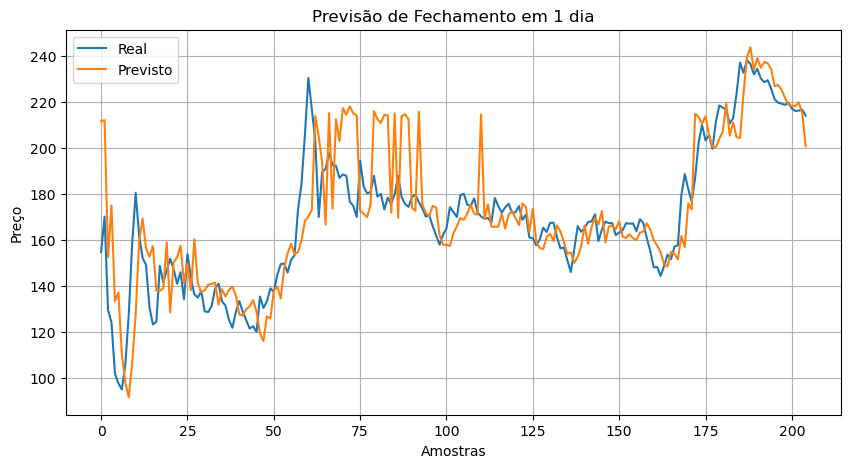

In [675]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Real')
plt.plot(preds, label='Previsto')
plt.legend()
plt.title('Previsão de Fechamento em 1 dia')
plt.xlabel('Amostras')
plt.ylabel('Preço')
plt.grid()
plt.show()


### Target 2

 Previsão para 1 dia(s):
MAE: 12.51
RMSE: 18.00


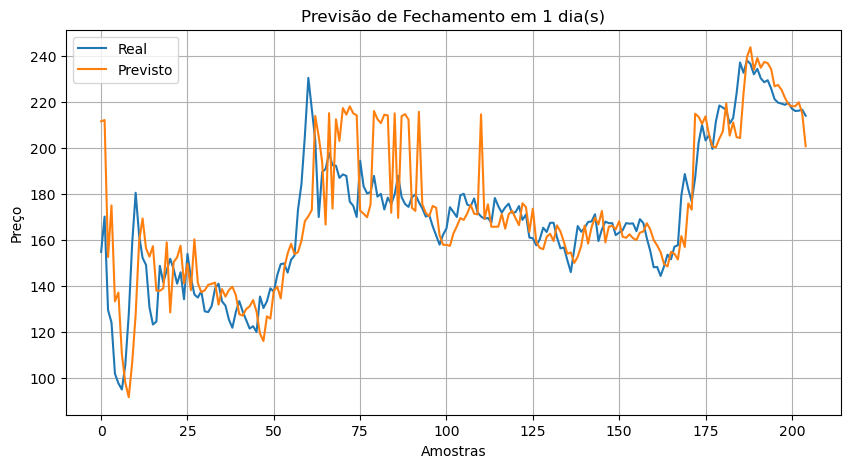

 Previsão para 3 dia(s):
MAE: 17.14
RMSE: 24.70


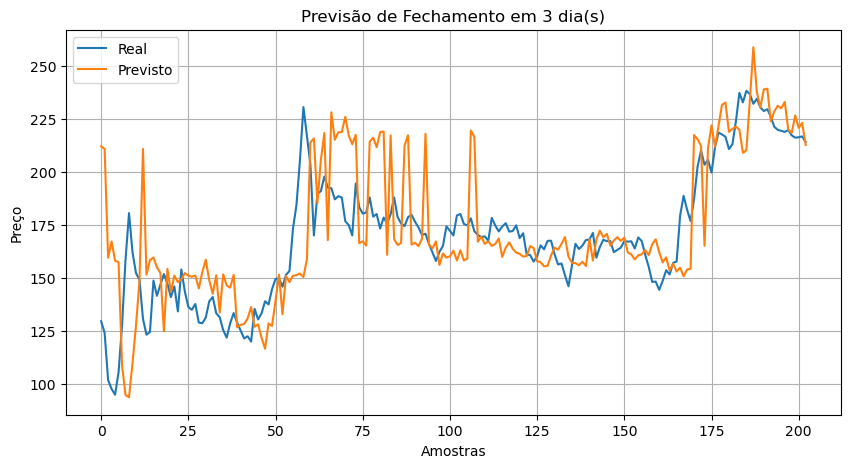

 Previsão para 7 dia(s):
MAE: 18.94
RMSE: 27.66


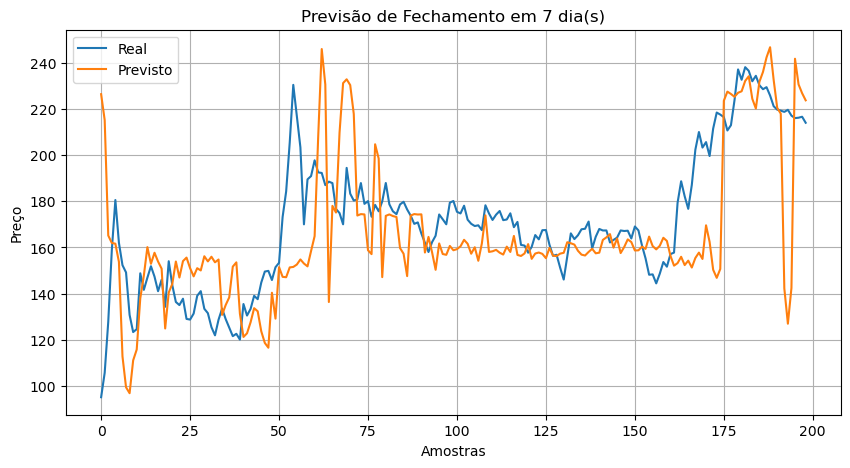

In [692]:
for dias in [1, 3, 7]:
    target_col = f'target_{dias}d'

    # Filtrar para evitar NaNs
    df_model_d = df_all_reset.dropna(subset=[target_col, 'Close_lag1', 'sentiment_lag1'])

    X = df_model_d[features]
    y = df_model_d[target_col]

    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    # Treinar modelo
    model = XGBRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Avaliação
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f' Previsão para {dias} dia(s):')
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')

    # Visualização
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Real')
    plt.plot(preds, label='Previsto')
    plt.title(f'Previsão de Fechamento em {dias} dia(s)')
    plt.xlabel('Amostras')
    plt.ylabel('Preço')
    plt.legend()
    plt.grid()
    plt.show()


# Construção do Modelo RNN test 01-01-2020 to 31-12-2020

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import yfinance as yf

## Test RNN test 01-01-2020 to 31-12-2020 Ca df

In [112]:
pip install yfinance


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
df_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


In [114]:
df_AAPL.shape

(254, 7)

In [115]:
# copy the df to df_new
df_AAPL_new = df_AAPL.copy()

In [116]:
# Set the new column order
new_order = ["Date", "Open", "High", "Low", "Adj Close", "Volume", "Close"]
df_AAPL_new= df_AAPL_new[new_order]

print(df_AAPL_new.head())

        Date       Open       High        Low  Adj Close     Volume      Close
0 2019-12-31  72.482498  73.419998  72.379997  71.520821  100805600  73.412498
1 2020-01-02  74.059998  75.150002  73.797501  73.152649  135480400  75.087502
2 2020-01-03  74.287498  75.144997  74.125000  72.441460  146322800  74.357498
3 2020-01-06  73.447502  74.989998  73.187500  73.018677  118387200  74.949997
4 2020-01-07  74.959999  75.224998  74.370003  72.675278  108872000  74.597504


In [117]:
# export the DataFrame df_new to a CSV file
csv_AAPL = "df_AAPL_data_test1.csv"
df_AAPL_new.to_csv(csv_AAPL, index=False) 

In [118]:
df_AAPL_new.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,2019-12-31,72.482498,73.419998,72.379997,71.520821,100805600,73.412498
1,2020-01-02,74.059998,75.150002,73.797501,73.152649,135480400,75.087502
2,2020-01-03,74.287498,75.144997,74.125000,72.441460,146322800,74.357498
3,2020-01-06,73.447502,74.989998,73.187500,73.018677,118387200,74.949997
4,2020-01-07,74.959999,75.224998,74.370003,72.675278,108872000,74.597504


## Train data

In [120]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
pip show yfinance

Name: yfinanceNote: you may need to restart the kernel to use updated packages.

Version: 0.2.59
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: C:\Users\tecap\anaconda3\Lib\site-packages
Requires: beautifulsoup4, curl_cffi, frozendict, multitasking, numpy, pandas, peewee, platformdirs, protobuf, pytz, requests, websockets
Required-by: 


In [122]:
# Train data
import yfinance as yf
ticker = "AAPL"
data = yf.download(ticker,
                   start="2018-01-01", 
                   end="2020-12-31")    

print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
2018-01-03  40.472786  41.017971  40.409341  40.543284  118071600
2018-01-04  40.660778  40.764175  40.437536  40.545630   89738400
2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
2018-01-08  40.970970  41.267060  40.872270  40.970970   82271200


In [123]:
# save the data in a .csv file
csv_AAPL = f"{ticker}_AAPL_historical_train_data.csv"# save as csv file
data.to_csv(csv_AAPL)

In [124]:
df_AAPL2 = pd.read_csv('AAPL_AAPL_historical_train_data.csv')

In [125]:
df_AAPL2.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,40.4798469543457,40.48924867167386,39.774868754324814,39.98636436575381,102223600
3,2018-01-03,40.47278594970703,41.01797065715718,40.4093405114548,40.543284466801936,118071600
4,2018-01-04,40.6607780456543,40.76417538562877,40.43753574472939,40.545630356009404,89738400


In [126]:
# Rename the 'Price' column to 'Date'
if "Price" in df_AAPL2.columns:
    df_AAPL2 = df_AAPL2.rename(columns={"Price": "Date"})

In [127]:
df_AAPL2.head()

,Date,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,40.4798469543457,40.48924867167386,39.774868754324814,39.98636436575381,102223600
3,2018-01-03,40.47278594970703,41.01797065715718,40.4093405114548,40.543284466801936,118071600
4,2018-01-04,40.6607780456543,40.76417538562877,40.43753574472939,40.545630356009404,89738400


In [128]:
# Remove the first line line 0
df_AAPL2 = df_AAPL2.iloc[1:].reset_index(drop=True)

In [129]:
df_AAPL2.head()

,Date,Close,High,Low,Open,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,40.4798469543457,40.48924867167386,39.774868754324814,39.98636436575381,102223600
2,2018-01-03,40.47278594970703,41.01797065715718,40.4093405114548,40.543284466801936,118071600
3,2018-01-04,40.6607780456543,40.76417538562877,40.43753574472939,40.545630356009404,89738400
4,2018-01-05,41.123722076416016,41.210668227095155,40.665487033276754,40.75713404190461,94640000


In [130]:
# Remove the first line line 0
df_AAPL2 = df_AAPL2.iloc[1:].reset_index(drop=True)

In [131]:
df_AAPL2.head()

,Date,Close,High,Low,Open,Volume
0,2018-01-02,40.4798469543457,40.48924867167386,39.774868754324814,39.98636436575381,102223600
1,2018-01-03,40.47278594970703,41.01797065715718,40.4093405114548,40.543284466801936,118071600
2,2018-01-04,40.6607780456543,40.76417538562877,40.43753574472939,40.545630356009404,89738400
3,2018-01-05,41.123722076416016,41.210668227095155,40.665487033276754,40.75713404190461,94640000
4,2018-01-08,40.970970153808594,41.26705960334316,40.87227008492711,40.970970153808594,82271200


In [132]:
df_AAPL2.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [133]:
df_AAPL2.shape

(755, 6)

In [134]:
df_AAPL2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    755 non-null    object
 1   Close   755 non-null    object
 2   High    755 non-null    object
 3   Low     755 non-null    object
 4   Open    755 non-null    object
 5   Volume  755 non-null    object
dtypes: object(6)
memory usage: 35.5+ KB


In [135]:
df_AAPL2["Close"] = pd.to_numeric(df_AAPL2["Close"], errors="coerce")
df_AAPL2["High"] = pd.to_numeric(df_AAPL2["High"], errors="coerce")
df_AAPL2["Low"] = pd.to_numeric(df_AAPL2["Low"], errors="coerce")
df_AAPL2["Open"] = pd.to_numeric(df_AAPL2["Open"], errors="coerce")
df_AAPL2["Volume"] = pd.to_numeric(df_AAPL2["Volume"], errors="coerce")
df_AAPL2["Date"] = pd.to_datetime(df_AAPL2["Date"], errors="coerce")

In [136]:
df_AAPL2.describe()

,Date,Close,High,Low,Open,Volume
count,755,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,2019-07-02 16:47:02.781457152,62.557520,63.263301,61.784150,62.503523,1.353322e+08
min,2018-01-02 00:00:00,33.915260,34.757238,33.869941,34.342211,4.544800e+07
25%,2018-10-01 12:00:00,44.191124,44.523874,43.854743,44.189904,9.310420e+07
50%,2019-07-03 00:00:00,51.412632,52.218405,51.032329,51.550490,1.210473e+08
75%,2020-04-01 12:00:00,74.948273,75.609055,73.928761,74.677983,1.614249e+08
max,2020-12-30 00:00:00,133.516205,135.567429,131.220756,134.844620,4.265100e+08
std,NaN,25.387784,25.802382,24.940800,25.414272,6.109801e+07


In [137]:
df_AAPL2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    755 non-null    datetime64[ns]
 1   Close   755 non-null    float64       
 2   High    755 non-null    float64       
 3   Low     755 non-null    float64       
 4   Open    755 non-null    float64       
 5   Volume  755 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.5 KB


In [138]:
df_AAPL3_Train = df_AAPL2.copy()

In [139]:
df_AAPL3_Train.head()

,Date,Close,High,Low,Open,Volume
0,2018-01-02,40.479847,40.489249,39.774869,39.986364,102223600
1,2018-01-03,40.472786,41.017971,40.409341,40.543284,118071600
2,2018-01-04,40.660778,40.764175,40.437536,40.545630,89738400
3,2018-01-05,41.123722,41.210668,40.665487,40.757134,94640000
4,2018-01-08,40.970970,41.267060,40.872270,40.970970,82271200


In [140]:
df_AAPL3_Train.shape

(755, 6)

In [141]:
# The code extracts only the second column of the DataFrame extrai a culona Close 
training_AAPL3 = df_AAPL3_Train.iloc[:, 1:2].values

In [142]:
# Content of the training base, it is an array with only the close col data
training_AAPL3

array([[ 40.47984695],
       [ 40.47278595],
       [ 40.66077805],
       [ 41.12372208],
       [ 40.97097015],
       [ 40.96627808],
       [ 40.95687866],
       [ 41.18951797],
       [ 41.61485672],
       [ 41.40336609],
       [ 42.08719254],
       [ 42.12478638],
       [ 41.93679428],
       [ 41.59370041],
       [ 41.60310364],
       [ 40.94042206],
       [ 40.20960617],
       [ 40.30358505],
       [ 39.4693718 ],
       [ 39.23672867],
       [ 39.3448143 ],
       [ 39.4270668 ],
       [ 37.71631622],
       [ 36.77400208],
       [ 38.31085968],
       [ 37.49073029],
       [ 36.45911789],
       [ 36.90505981],
       [ 38.39155197],
       [ 38.77614594],
       [ 39.49107361],
       [ 40.81713104],
       [ 40.68499374],
       [ 40.54814911],
       [ 40.36410522],
       [ 40.70149994],
       [ 41.40936279],
       [ 42.22811127],
       [ 42.091259  ],
       [ 42.02755356],
       [ 41.29138947],
       [ 41.57689285],
       [ 41.72080612],
       [ 41

In [143]:
# # Set the new column order
#new_order2 = ["Date", "Open", "High", "Low", "Close", "Volume"]
#df_new2 = df_new2[new_order2]

#print(df_new2.head())


## Preprocessing, 
- normalization of data to reduce the scale of values.

In [145]:
# to scale values ​​between 0 and 1
normalizer = MinMaxScaler(feature_range=(0, 1))
training_AAPL3_normalizer = normalizer.fit_transform(training_AAPL3)
training_AAPL3_normalizer

array([[0.06590888],
       [0.06583799],
       [0.06772544],
       [0.07237343],
       [0.07083979],
       [0.07079268],
       [0.07069831],
       [0.07303402],
       [0.07730445],
       [0.07518107],
       [0.08204673],
       [0.08242418],
       [0.08053673],
       [0.07709204],
       [0.07718645],
       [0.07053308],
       [0.06319564],
       [0.0641392 ],
       [0.05576364],
       [0.05342789],
       [0.05451308],
       [0.0553389 ],
       [0.03816285],
       [0.02870195],
       [0.04413211],
       [0.03589795],
       [0.0255405 ],
       [0.03001778],
       [0.04494226],
       [0.04880361],
       [0.05598153],
       [0.06929523],
       [0.06796857],
       [0.06659464],
       [0.06474682],
       [0.06813429],
       [0.07524128],
       [0.08346157],
       [0.08208756],
       [0.08144795],
       [0.07405682],
       [0.07692329],
       [0.07836819],
       [0.07801288],
       [0.07412775],
       [0.07865241],
       [0.08585423],
       [0.089

In [146]:
training_AAPL3_normalizer.shape

(755, 1)

In [147]:
# Criar scaler e normalizar
#scaler_indep = MinMaxScaler()
#independent_normalizer = scaler_indep.fit_transform(independent)

In [148]:
#independent_normalizer.shape

In [149]:
# time range of 7 previous days to make the price forecast for the next day 
# we will need two variables 
# x = forecasters 
# y = current price

X =  [] # forecaters
Y = [] # current price
for i in range(7, 502): # 7 preços anteriores
    X.append(training_AAPL3_normalizer[i - 7:i, 0])# to access data from position -90 to the last value of df 1004 (i)
    Y.append(training_AAPL3_normalizer[i, 0])


In [150]:
# convert to array because it is as list
X, Y = np.array(X), np.array(Y)

In [151]:
X

array([[0.06590888, 0.06583799, 0.06772544, ..., 0.07083979, 0.07079268,
        0.07069831],
       [0.06583799, 0.06772544, 0.07237343, ..., 0.07079268, 0.07069831,
        0.07303402],
       [0.06772544, 0.07237343, 0.07083979, ..., 0.07069831, 0.07303402,
        0.07730445],
       ...,
       [0.3397567 , 0.34109359, 0.33946501, ..., 0.33873593, 0.34982012,
        0.35047628],
       [0.34109359, 0.33946501, 0.34014559, ..., 0.34982012, 0.35047628,
        0.36418569],
       [0.33946501, 0.34014559, 0.33873593, ..., 0.35047628, 0.36418569,
        0.36391851]])

In [152]:
X.shape #  provisional features

(495, 7)

In [153]:
Y # real price

array([0.07303402, 0.07730445, 0.07518107, 0.08204673, 0.08242418,
       0.08053673, 0.07709204, 0.07718645, 0.07053308, 0.06319564,
       0.0641392 , 0.05576364, 0.05342789, 0.05451308, 0.0553389 ,
       0.03816285, 0.02870195, 0.04413211, 0.03589795, 0.0255405 ,
       0.03001778, 0.04494226, 0.04880361, 0.05598153, 0.06929523,
       0.06796857, 0.06659464, 0.06474682, 0.06813429, 0.07524128,
       0.08346157, 0.08208756, 0.08144795, 0.07405682, 0.07692329,
       0.07836819, 0.07801288, 0.07412775, 0.07865241, 0.08585423,
       0.08997617, 0.08583053, 0.08220598, 0.08270346, 0.08121115,
       0.07476751, 0.07462546, 0.06522056, 0.05948769, 0.05022507,
       0.06877393, 0.05827948, 0.05387324, 0.05695281, 0.05434697,
       0.05839794, 0.06602596, 0.06884506, 0.05837431, 0.06233045,
       0.06991109, 0.06799224, 0.07201961, 0.0734171 , 0.07599923,
       0.08173225, 0.08078468, 0.06884506, 0.05207277, 0.05093576,
       0.04548715, 0.04716901, 0.0485195 , 0.04401824, 0.05098

In [154]:
Y.shape

(495,)

In [155]:
# Converter em arrays
X = np.array(X) # (n_samples, 96)
Y = np.array(Y) # (n_samples, 3)
X = X.reshape((X.shape[0], X.shape[1], 1))  # reshape para LSTM (samples, time_steps, 1)

print("Sequências preparadas para previsão de +1d, +3d e +7d")
print(f"X shape: {X.shape}")  # (n_samples, 96, 1)
print(f"Y shape: {Y.shape}")  # (n_samples, 3)


Sequências preparadas para previsão de +1d, +3d e +7d
X shape: (495, 7, 1)
Y shape: (495,)


In [156]:
X

array([[[0.06590888],
        [0.06583799],
        [0.06772544],
        ...,
        [0.07083979],
        [0.07079268],
        [0.07069831]],

       [[0.06583799],
        [0.06772544],
        [0.07237343],
        ...,
        [0.07079268],
        [0.07069831],
        [0.07303402]],

       [[0.06772544],
        [0.07237343],
        [0.07083979],
        ...,
        [0.07069831],
        [0.07303402],
        [0.07730445]],

       ...,

       [[0.3397567 ],
        [0.34109359],
        [0.33946501],
        ...,
        [0.33873593],
        [0.34982012],
        [0.35047628]],

       [[0.34109359],
        [0.33946501],
        [0.34014559],
        ...,
        [0.34982012],
        [0.35047628],
        [0.36418569]],

       [[0.33946501],
        [0.34014559],
        [0.33873593],
        ...,
        [0.35047628],
        [0.36418569],
        [0.36391851]]])

In [157]:
X.shape

(495, 7, 1)

In [158]:
Y

array([0.07303402, 0.07730445, 0.07518107, 0.08204673, 0.08242418,
       0.08053673, 0.07709204, 0.07718645, 0.07053308, 0.06319564,
       0.0641392 , 0.05576364, 0.05342789, 0.05451308, 0.0553389 ,
       0.03816285, 0.02870195, 0.04413211, 0.03589795, 0.0255405 ,
       0.03001778, 0.04494226, 0.04880361, 0.05598153, 0.06929523,
       0.06796857, 0.06659464, 0.06474682, 0.06813429, 0.07524128,
       0.08346157, 0.08208756, 0.08144795, 0.07405682, 0.07692329,
       0.07836819, 0.07801288, 0.07412775, 0.07865241, 0.08585423,
       0.08997617, 0.08583053, 0.08220598, 0.08270346, 0.08121115,
       0.07476751, 0.07462546, 0.06522056, 0.05948769, 0.05022507,
       0.06877393, 0.05827948, 0.05387324, 0.05695281, 0.05434697,
       0.05839794, 0.06602596, 0.06884506, 0.05837431, 0.06233045,
       0.06991109, 0.06799224, 0.07201961, 0.0734171 , 0.07599923,
       0.08173225, 0.08078468, 0.06884506, 0.05207277, 0.05093576,
       0.04548715, 0.04716901, 0.0485195 , 0.04401824, 0.05098

In [159]:
Y.shape

(495,)

### Create the RNN structure

In [593]:
regressor = Sequential()
# Units Positive int, dimensionality of output space 
# set to 100, defines the number of loops or the number of times a neuron sends information to itself
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X.shape[1], 1)))
regressor.add(Dropout(0.3))# 30% to prevent overfiting

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))# activetion function for regrassion problem 

regressor.summary()


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_78 (LSTM)                  │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_79 (LSTM)                  │ (None, 7, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_80 (LSTM)                  │ (None, 7, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_81 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [595]:
# compile the neural network 
# training will be done with mean_squared_error, larger errors will have larger weights
# to calculate the algorithm we will use 'mean_squared_error,
# to Evaluate the algorithm we will use mean_absolute_error
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [597]:
# train the algorithm
# x = previous 7 days
# y = real price
# train for 100 times epochs
regressor.fit(X, Y, epochs = 100, batch_size = 16)


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0718
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0608
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0547
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0518
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0371
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mean_absolute_error: 0.0255
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5051e-04 - mean_absolute_error: 0.0230
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3921e-04 - mean_absolute_error: 0.0215
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9868e-04 - mean_absolute_error: 0.0230
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2373e-04 - mean_absolute_error: 0.0228
Epoch 11/100
31/31 ━━━━

### Make predictions with the df test 2020

In [600]:
df_prediction_AAPL = pd.read_csv('df_AAPL_data_test1.csv')
df_prediction_AAPL

,Date,Open,High,Low,Adj Close,Volume,Close
0,2019-12-31,72.482498,73.419998,72.379997,71.520821,100805600,73.412498
1,2020-01-02,74.059998,75.150002,73.797501,73.152649,135480400,75.087502
2,2020-01-03,74.287498,75.144997,74.125000,72.441460,146322800,74.357498
3,2020-01-06,73.447502,74.989998,73.187500,73.018677,118387200,74.949997
4,2020-01-07,74.959999,75.224998,74.370003,72.675278,108872000,74.597504
...,...,...,...,...,...,...,...
249,2020-12-24,131.320007,133.460007,131.100006,129.679718,54930100,131.970001
250,2020-12-28,133.990005,137.339996,133.509995,134.317825,124486200,136.690002
251,2020-12-29,138.050003,138.789993,134.339996,132.529404,121047300,134.869995
252,2020-12-30,135.580002,135.990005,133.399994,131.399368,96452100,133.720001


In [602]:
# # Set the new column order
new_order2 = ["Date", "Close", "High", "Low", "Open", "Volume"]
df_prediction_AAPL = df_prediction_AAPL[new_order2]

print(df_prediction_AAPL.head())

         Date      Close       High        Low       Open     Volume
0  2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600
1  2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400
2  2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800
3  2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200
4  2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000


In [604]:
df_prediction_AAPL.shape

(254, 6)

In [606]:
y_test = df_prediction_AAPL.iloc[:, 1:2].values# convert the close in numpyarray 

In [608]:
y_test

array([[ 73.41249847],
       [ 75.08750153],
       [ 74.35749817],
       [ 74.94999695],
       [ 74.59750366],
       [ 75.79750061],
       [ 77.40750122],
       [ 77.58249664],
       [ 79.23999786],
       [ 78.16999817],
       [ 77.83499908],
       [ 78.80999756],
       [ 79.68250275],
       [ 79.14250183],
       [ 79.42500305],
       [ 79.80750275],
       [ 79.57749939],
       [ 77.23750305],
       [ 79.42250061],
       [ 81.08499908],
       [ 80.96749878],
       [ 77.37750244],
       [ 77.16500092],
       [ 79.71250153],
       [ 80.36250305],
       [ 81.30249786],
       [ 80.00749969],
       [ 80.38749695],
       [ 79.90249634],
       [ 81.80000305],
       [ 81.21749878],
       [ 81.23750305],
       [ 79.75      ],
       [ 80.90499878],
       [ 80.07499695],
       [ 78.26249695],
       [ 74.54499817],
       [ 72.01999664],
       [ 73.16249847],
       [ 68.37999725],
       [ 68.33999634],
       [ 74.70249939],
       [ 72.33000183],
       [ 75

In [610]:
# concatenate the two open columns of df train and test
df_complete = pd.concat((df_AAPL3_Train['Close'], df_prediction_AAPL['Close']), axis = 0)

In [612]:
df_complete.shape

(1009,)

In [614]:
df_complete # create a variable with all prices

0       40.479847
1       40.472786
2       40.660778
3       41.123722
4       40.970970
          ...    
249    131.970001
250    136.690002
251    134.869995
252    133.720001
253    132.690002
Name: Close, Length: 1009, dtype: float64

In [616]:
# vai returnar a quantidade de resgistos da base de dados inteira contatenada e a subtracao entre a  (df_complete- df_test) 
len(df_complete), len(df_prediction_AAPL), 756-254-7

(1009, 254, 495)

In [618]:
df_complete[495:]# defined index to access the complete database from position 495

495     67.794083
496     67.653679
497     68.757675
498     68.823029
499     70.188499
          ...    
249    131.970001
250    136.690002
251    134.869995
252    133.720001
253    132.690002
Name: Close, Length: 514, dtype: float64

In [620]:
# create the variable that will receive the complete database
entries = df_complete[len(df_complete) - len(df_prediction_AAPL) - 7:].values

In [622]:
entries

array([125.25262451, 128.81788635, 127.91924286, 128.90579224,
       133.51620483, 131.7384491 , 130.61517334,  73.41249847,
        75.08750153,  74.35749817,  74.94999695,  74.59750366,
        75.79750061,  77.40750122,  77.58249664,  79.23999786,
        78.16999817,  77.83499908,  78.80999756,  79.68250275,
        79.14250183,  79.42500305,  79.80750275,  79.57749939,
        77.23750305,  79.42250061,  81.08499908,  80.96749878,
        77.37750244,  77.16500092,  79.71250153,  80.36250305,
        81.30249786,  80.00749969,  80.38749695,  79.90249634,
        81.80000305,  81.21749878,  81.23750305,  79.75      ,
        80.90499878,  80.07499695,  78.26249695,  74.54499817,
        72.01999664,  73.16249847,  68.37999725,  68.33999634,
        74.70249939,  72.33000183,  75.68499756,  73.23000336,
        72.25749969,  66.54250336,  71.33499908,  68.85749817,
        62.05749893,  69.49250031,  60.55250168,  63.21500015,
        61.66749954,  61.19499969,  57.31000137,  56.09

In [624]:
entries.shape

(261,)

In [626]:
# convert the df to a matrix, -1 to add a new dimension
entries = entries.reshape(-1, 1)
entries.shape

(261, 1)

In [628]:
entries

array([[125.25262451],
       [128.81788635],
       [127.91924286],
       [128.90579224],
       [133.51620483],
       [131.7384491 ],
       [130.61517334],
       [ 73.41249847],
       [ 75.08750153],
       [ 74.35749817],
       [ 74.94999695],
       [ 74.59750366],
       [ 75.79750061],
       [ 77.40750122],
       [ 77.58249664],
       [ 79.23999786],
       [ 78.16999817],
       [ 77.83499908],
       [ 78.80999756],
       [ 79.68250275],
       [ 79.14250183],
       [ 79.42500305],
       [ 79.80750275],
       [ 79.57749939],
       [ 77.23750305],
       [ 79.42250061],
       [ 81.08499908],
       [ 80.96749878],
       [ 77.37750244],
       [ 77.16500092],
       [ 79.71250153],
       [ 80.36250305],
       [ 81.30249786],
       [ 80.00749969],
       [ 80.38749695],
       [ 79.90249634],
       [ 81.80000305],
       [ 81.21749878],
       [ 81.23750305],
       [ 79.75      ],
       [ 80.90499878],
       [ 80.07499695],
       [ 78.26249695],
       [ 74

In [630]:
# call the normalizer to set values ​​between 0 and 1
entries = normalizer.transform(entries)

In [632]:
entries

array([[0.91703311],
       [0.95282858],
       [0.94380614],
       [0.95371116],
       [1.        ],
       [0.98215122],
       [0.97087345],
       [0.39655486],
       [0.413372  ],
       [0.40604271],
       [0.41199144],
       [0.40845239],
       [0.42050043],
       [0.43666494],
       [0.43842191],
       [0.45506333],
       [0.44432046],
       [0.44095705],
       [0.4507461 ],
       [0.45950611],
       [0.45408446],
       [0.45692079],
       [0.46076112],
       [0.45845187],
       [0.43495815],
       [0.45689567],
       [0.47358726],
       [0.47240755],
       [0.43636375],
       [0.43423023],
       [0.4598073 ],
       [0.46633336],
       [0.47577097],
       [0.4627691 ],
       [0.4665843 ],
       [0.46171486],
       [0.48076595],
       [0.47491757],
       [0.47511841],
       [0.46018379],
       [0.47178005],
       [0.46344678],
       [0.44524916],
       [0.40792523],
       [0.38257405],
       [0.39404484],
       [0.34602821],
       [0.345

In [634]:
# Create X_test ensuring that all sequences are the same length
X_test = []
for i in range(7, 261):
    if len(entries[i - 7:i, 0]) == 7:  # # Ensure the size is always 7
        X_test.append(entries[i - 7:i, 0])

# Convert X_test to a NumPy array
X_test = np.array(X_test)

# Reshape to modelo LSTM/RNN
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("X_test shape:", X_test.shape)  # Check the final format

X_test shape: (254, 7, 1)


In [636]:
X_test

array([[[0.91703311],
        [0.95282858],
        [0.94380614],
        ...,
        [1.        ],
        [0.98215122],
        [0.97087345]],

       [[0.95282858],
        [0.94380614],
        [0.95371116],
        ...,
        [0.98215122],
        [0.97087345],
        [0.39655486]],

       [[0.94380614],
        [0.95371116],
        [1.        ],
        ...,
        [0.97087345],
        [0.39655486],
        [0.413372  ]],

       ...,

       [[0.95164496],
        [0.93116329],
        [0.94692611],
        ...,
        [0.9743356 ],
        [0.98447601],
        [1.03186514]],

       [[0.93116329],
        [0.94692611],
        [0.98357245],
        ...,
        [0.98447601],
        [1.03186514],
        [1.01359214]],

       [[0.94692611],
        [0.98357245],
        [0.9743356 ],
        ...,
        [1.03186514],
        [1.01359214],
        [1.00204613]]])

In [638]:
prediction = regressor.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [640]:
prediction

array([[0.80106086],
       [0.8043386 ],
       [0.7945115 ],
       [0.7727725 ],
       [0.7301113 ],
       [0.65254045],
       [0.547142  ],
       [0.41623452],
       [0.42136222],
       [0.42378294],
       [0.42976192],
       [0.43569216],
       [0.44379896],
       [0.44996163],
       [0.45281795],
       [0.4558415 ],
       [0.45517063],
       [0.45769963],
       [0.46122295],
       [0.46221784],
       [0.46109208],
       [0.46175238],
       [0.46182975],
       [0.46054617],
       [0.45947158],
       [0.46438298],
       [0.46419242],
       [0.46008646],
       [0.45666605],
       [0.463019  ],
       [0.47088644],
       [0.47303927],
       [0.47396812],
       [0.47261646],
       [0.4745681 ],
       [0.47553715],
       [0.47723725],
       [0.47262475],
       [0.4666179 ],
       [0.45712247],
       [0.4471427 ],
       [0.4293755 ],
       [0.40997007],
       [0.39298815],
       [0.38556707],
       [0.38580155],
       [0.38406125],
       [0.394

In [642]:
# invert the normalization, for better interpretation of the data
prediction = normalizer.inverse_transform(prediction)

In [644]:
prediction

array([[113.701675],
       [114.028145],
       [113.049355],
       [110.884125],
       [106.63503 ],
       [ 98.908905],
       [ 88.411125],
       [ 75.37261 ],
       [ 75.88334 ],
       [ 76.12444 ],
       [ 76.71995 ],
       [ 77.31061 ],
       [ 78.11806 ],
       [ 78.731865],
       [ 79.01635 ],
       [ 79.317505],
       [ 79.25069 ],
       [ 79.50257 ],
       [ 79.8535  ],
       [ 79.95259 ],
       [ 79.84046 ],
       [ 79.906235],
       [ 79.91394 ],
       [ 79.786095],
       [ 79.67906 ],
       [ 80.16824 ],
       [ 80.14926 ],
       [ 79.74031 ],
       [ 79.39963 ],
       [ 80.032394],
       [ 80.815994],
       [ 81.03042 ],
       [ 81.12293 ],
       [ 80.988304],
       [ 81.182686],
       [ 81.279205],
       [ 81.44854 ],
       [ 80.98913 ],
       [ 80.39085 ],
       [ 79.44509 ],
       [ 78.451096],
       [ 76.681465],
       [ 74.748665],
       [ 73.05725 ],
       [ 72.31811 ],
       [ 72.34146 ],
       [ 72.16812 ],
       [ 73.2

In [646]:
y_test

array([[ 73.41249847],
       [ 75.08750153],
       [ 74.35749817],
       [ 74.94999695],
       [ 74.59750366],
       [ 75.79750061],
       [ 77.40750122],
       [ 77.58249664],
       [ 79.23999786],
       [ 78.16999817],
       [ 77.83499908],
       [ 78.80999756],
       [ 79.68250275],
       [ 79.14250183],
       [ 79.42500305],
       [ 79.80750275],
       [ 79.57749939],
       [ 77.23750305],
       [ 79.42250061],
       [ 81.08499908],
       [ 80.96749878],
       [ 77.37750244],
       [ 77.16500092],
       [ 79.71250153],
       [ 80.36250305],
       [ 81.30249786],
       [ 80.00749969],
       [ 80.38749695],
       [ 79.90249634],
       [ 81.80000305],
       [ 81.21749878],
       [ 81.23750305],
       [ 79.75      ],
       [ 80.90499878],
       [ 80.07499695],
       [ 78.26249695],
       [ 74.54499817],
       [ 72.01999664],
       [ 73.16249847],
       [ 68.37999725],
       [ 68.33999634],
       [ 74.70249939],
       [ 72.33000183],
       [ 75

In [648]:
prediction.mean()# mean extration

91.21905

In [650]:
y_test.mean()# mean extration

95.26071827805887

In [652]:
y_test.shape

(254, 1)

In [654]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

7.081545026283566

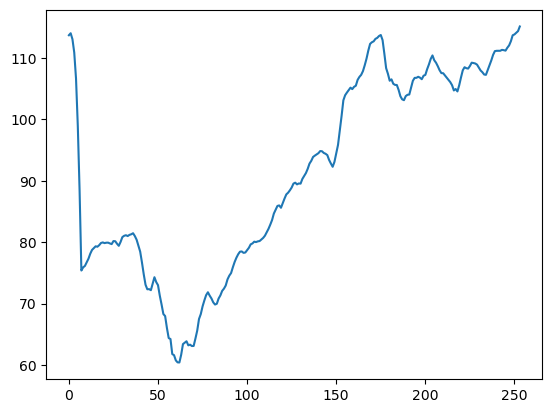

In [656]:
plt.plot(prediction)

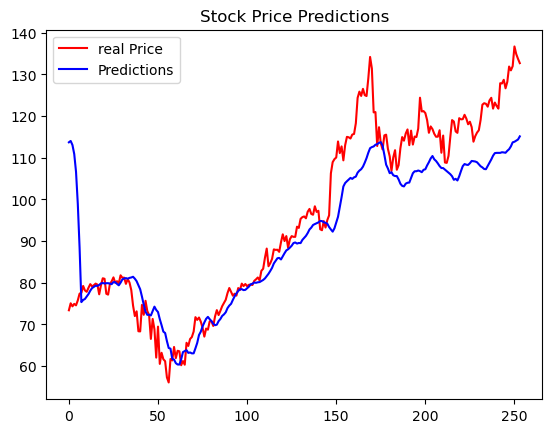

In [658]:
plt.plot(y_test, color = "red", label = "real Price")
plt.plot(prediction, color = "blue", label = "Predictions")
plt.title("Stock Price Predictions")
plt.legend();

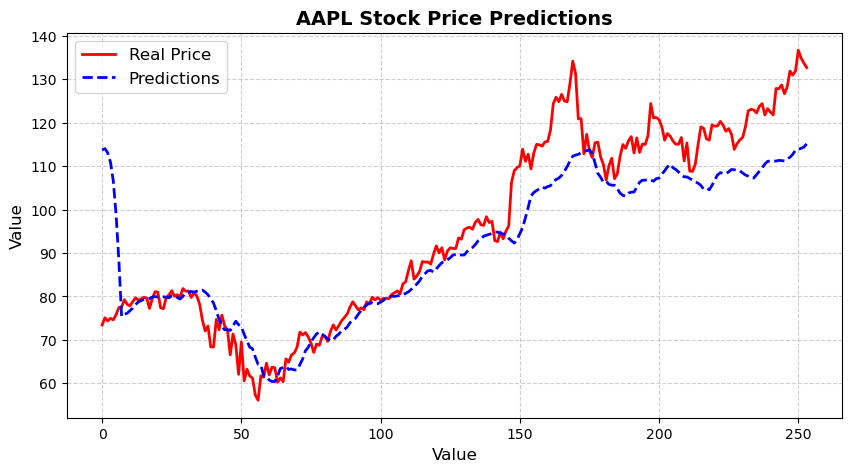

In [660]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  

plt.plot(y_test, color="red", label="Real Price", linestyle='-', linewidth=2)  # Linha contínua
plt.plot(prediction, color="blue", label="Predictions", linestyle='--', linewidth=2)  # Linha pontilhada

plt.title("AAPL Stock Price Predictions", fontsize=14, fontweight='bold')  # Título maior e em negrito
plt.xlabel("Value", fontsize=12)
plt.ylabel("Value", fontsize=12)

plt.legend(fontsize=12) 
plt.grid(True, linestyle="--", alpha=0.6)  

plt.show() 

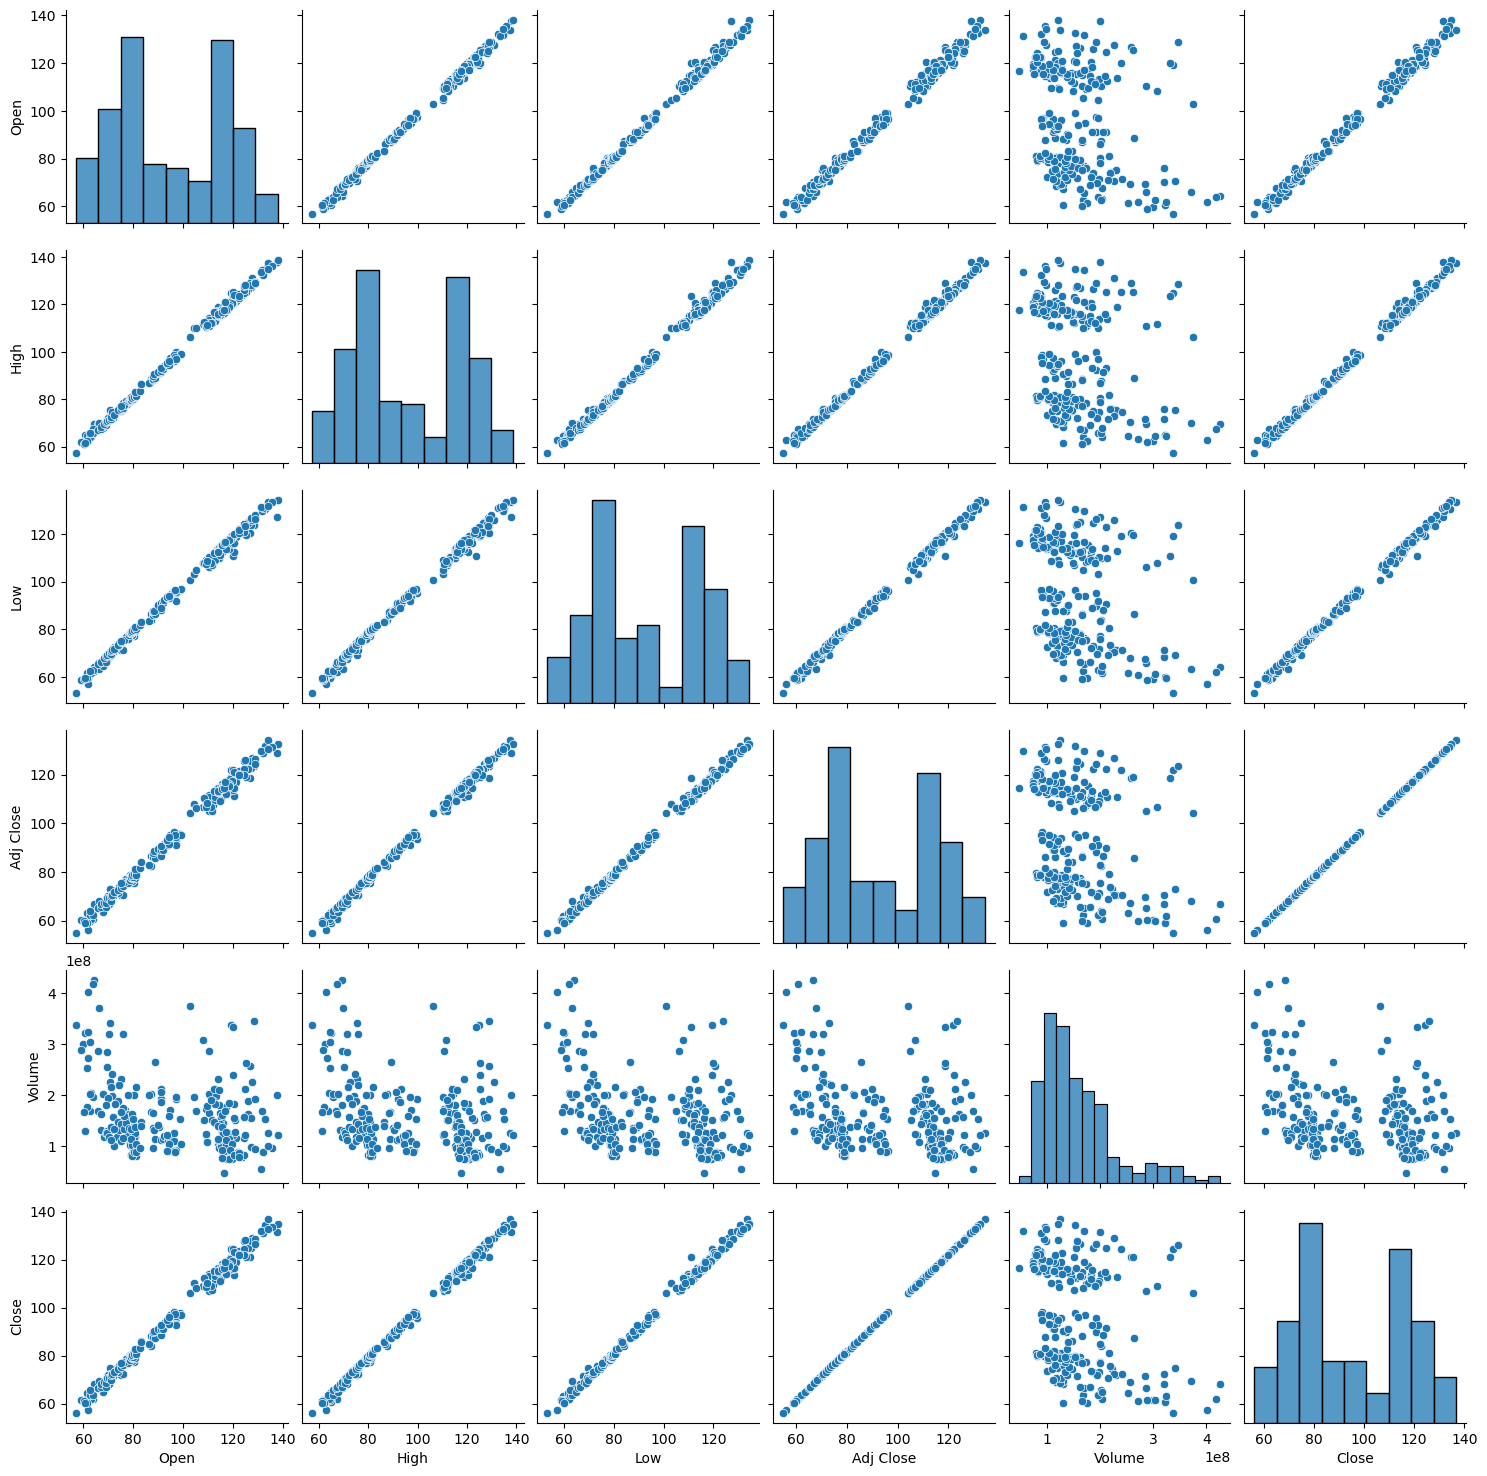

In [662]:
sns.pairplot(df_AAPL_new)

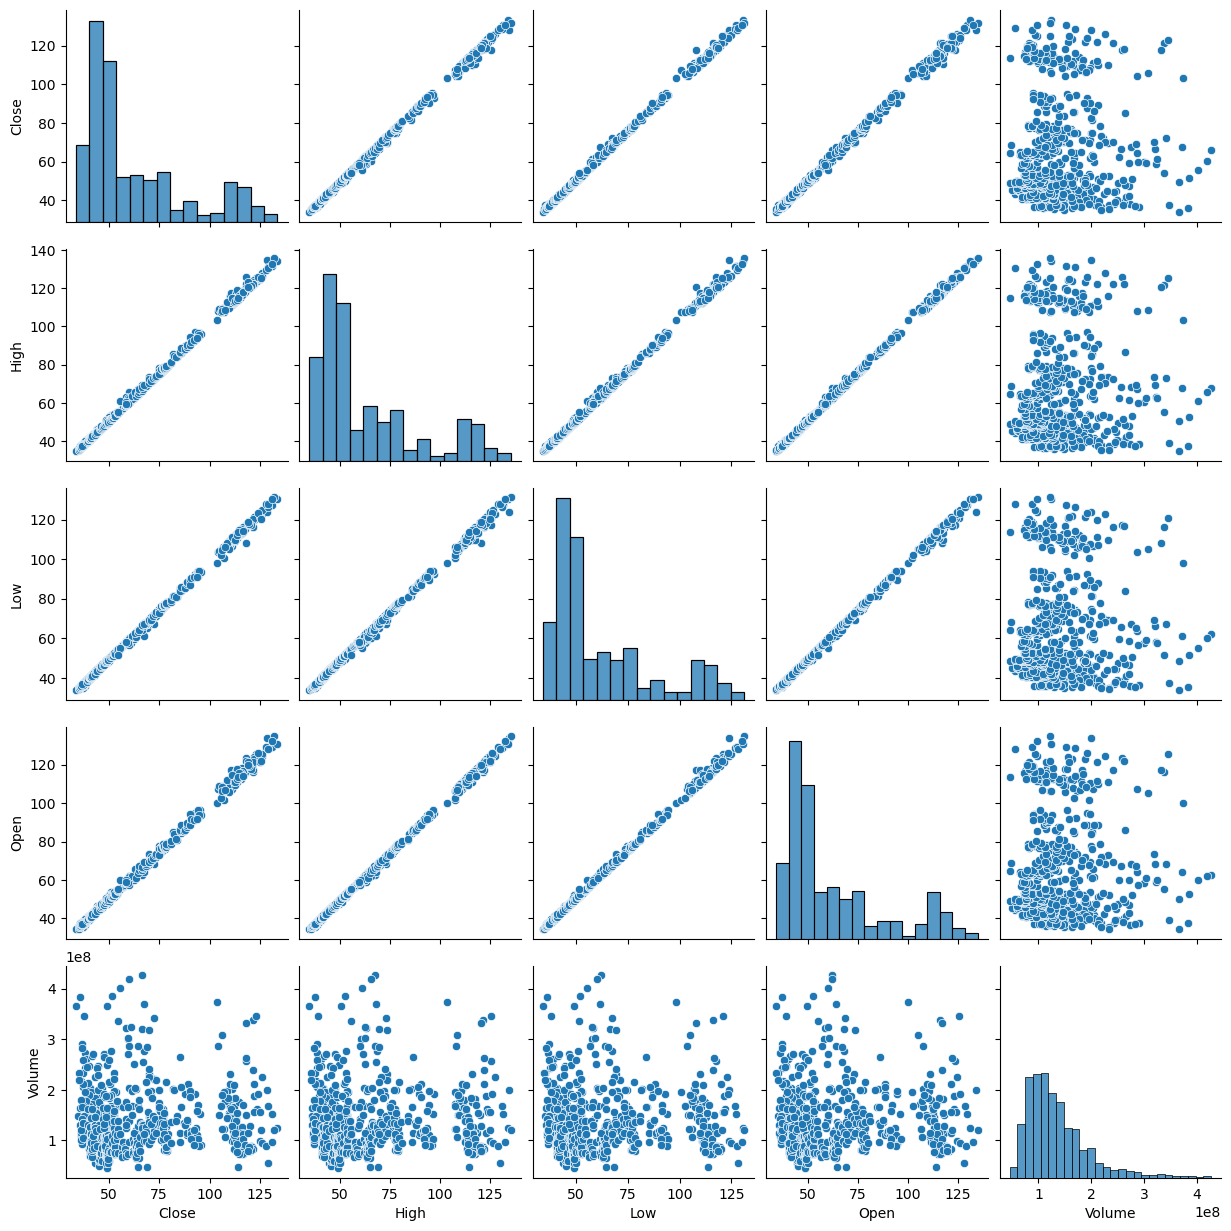

In [197]:
sns.pairplot(df_AAPL3_Train)

## Hyperparameter Tunnning using GridSearchCV

In [591]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Adicione esta linha!

# Dividir em treino e validação (80% treino, 20% validação, sem embaralhar para séries temporais).
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Definir listas de valores para cada hiperparâmetro.
lstm_units_list = [32, 50, 64]
dropout_list = [0.2, 0.3, 0.4]
batch_sizes = [16, 32]
epochs_list = [50, 100]

best_score = float('inf')
best_params = {}

# Função que cria o modelo LSTM dado nº de unidades e dropout.
def create_model(units, dropout_rate):
    model = Sequential()
    # Primeira camada LSTM (com return_sequences=True para ter segunda camada LSTM)
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    # Segunda camada LSTM (sem return_sequences)
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    # Camada de saída
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')  # MSE como função de perda
    return model

# Laços aninhados para percorrer todas as combinações de hiperparâmetros.
for units in lstm_units_list:
    for dropout_rate in dropout_list:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                # Criar e treinar o modelo com os hiperparâmetros atuais
                model = create_model(units, dropout_rate)
                model.fit(X_train, Y_train, 
                          epochs=epochs, 
                          batch_size=batch_size, 
                          verbose=0)  # verbose=0 para não poluir a saída
                
                # Previsão no conjunto de validação
                Y_pred = model.predict(X_val)
                
                # Calcular métricas de erro (RMSE e MAE)
                rmse = np.sqrt(mean_squared_error(Y_val, Y_pred))
                mae = mean_absolute_error(Y_val, Y_pred)
                
                # Verificar se esta combinação é melhor
                if rmse < best_score:
                    best_score = rmse
                    best_params = {
                        'units': units,
                        'dropout': dropout_rate,
                        'batch_size': batch_size,
                        'epochs': epochs,
                        'RMSE': rmse,
                        'MAE': mae
                    }

# Exibir o melhor conjunto de hiperparâmetros e o desempenho correspondente
print("Melhor conjunto de hiperparâmetros encontrado:")
print(best_params)

C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/stepWARNING:tensorflow:6 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000238051F7060> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


C:\Users\tecap\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Melhor conjunto de hiperparâmetros encontrado:
{'units': 50, 'dropout': 0.3, 'batch_size': 16, 'epochs': 100, 'RMSE': 0.008491960296318943, 'MAE': 0.0067776573695701135}


In [223]:
time_series[1]

C:\Users\tecap\AppData\Local\Temp\ipykernel_45296\573606877.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  time_series[1]


40.4727897644043

In [224]:
time_series['2018-01-02']# test to verify index data

40.47984313964844

In [225]:
time_series.index.max() # index max value

Timestamp('2020-12-30 00:00:00')

In [226]:
time_series.index.min() # index min value

Timestamp('2018-01-02 00:00:00')

In [227]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.205429
p-value: 0.996023
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


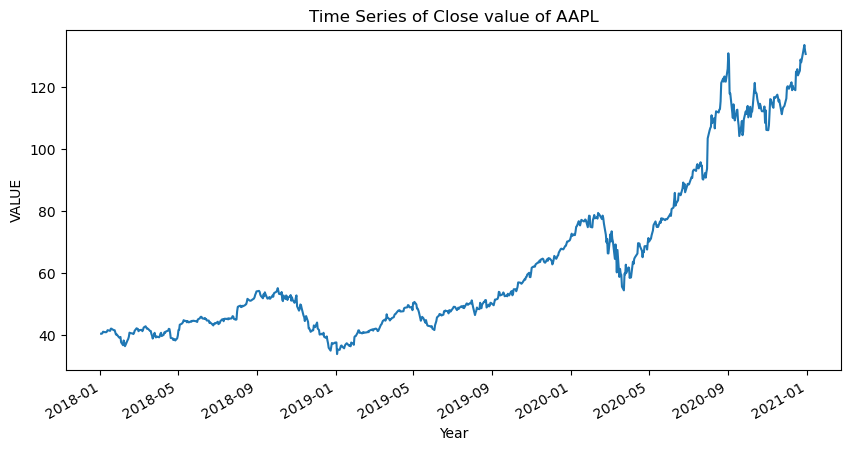

In [228]:
# Viewing the complete time series
df2['Close'].plot(title='Time Series of Close value of AAPL', figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.show()


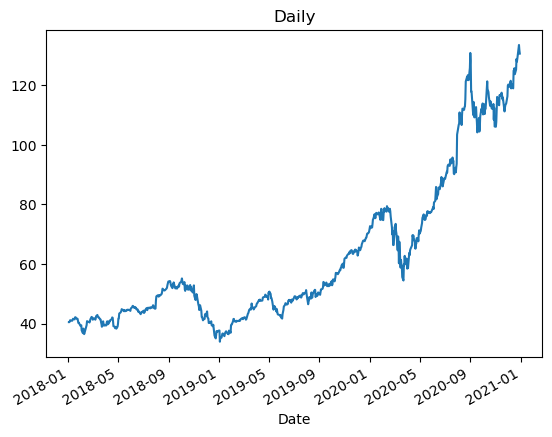

In [229]:
# Daily revenues line plot
df2['Close'].plot(title = 'Daily')
plt.show()

C:\Users\tecap\AppData\Local\Temp\ipykernel_45296\3896021699.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df2['Close'].resample('M').mean(),


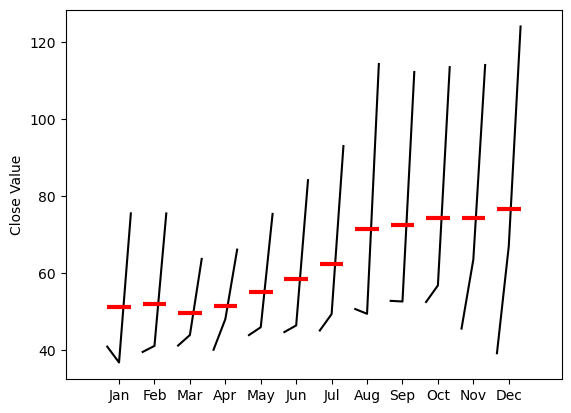

In [474]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of revenue values
month_plot(df2['Close'].resample('M').mean(),
           ylabel = 'Close Value')
plt.show()

C:\Users\tecap\AppData\Local\Temp\ipykernel_45296\2491828187.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df2['Close'].resample('Q').mean(),


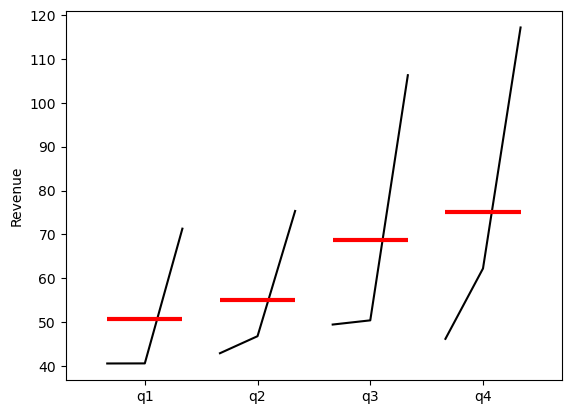

In [231]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of revenue values
# .resample('Q') - to convert the time series data into quarterly seasonality
quarter_plot(df2['Close'].resample('Q').mean(),
           ylabel = 'Revenue')
plt.show()

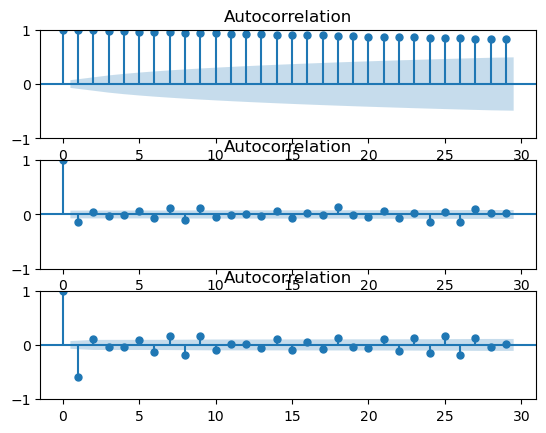

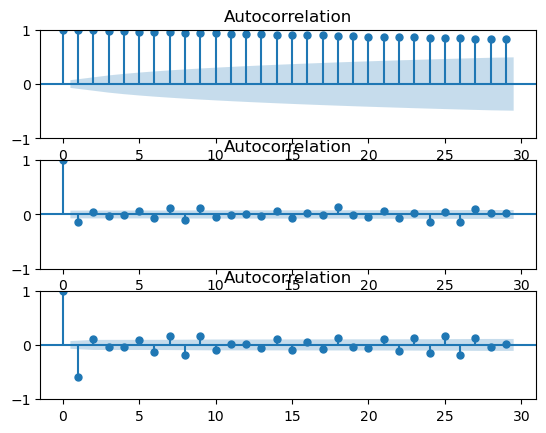

In [232]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df2.Close, ax=ax1)
plot_acf(df2.Close.diff().dropna(), ax=ax2)
plot_acf(df2.Close.diff().diff().dropna(), ax=ax3)


C:\Users\tecap\AppData\Local\Temp\ipykernel_45296\4242080651.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_y = time_series.resample('A').sum()


Date
2018-12-31    11242.636562
2019-12-31    12630.144333
2020-12-31    23358.147034
Freq: YE-DEC, Name: Close, dtype: float64

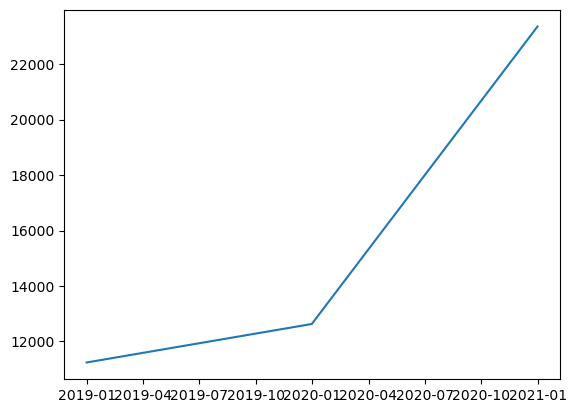

In [233]:
ts_y = time_series.resample('A').sum()
plt.plot(ts_y)
ts_y

In [234]:
# Set the dataframe to have daily frequency
time_series = time_series.asfreq("D")
time_series = time_series.fillna(method='ffill')

C:\Users\tecap\AppData\Local\Temp\ipykernel_45296\1939824115.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = time_series.fillna(method='ffill')


In [571]:
# Definir intervalo de treino até 2020-11-30
train_end = pd.to_datetime('2020-11-30')
series = df2['Close']
series_train = series.loc[:train_end]
series_test = series.loc[train_end + pd.Timedelta(days=1):]

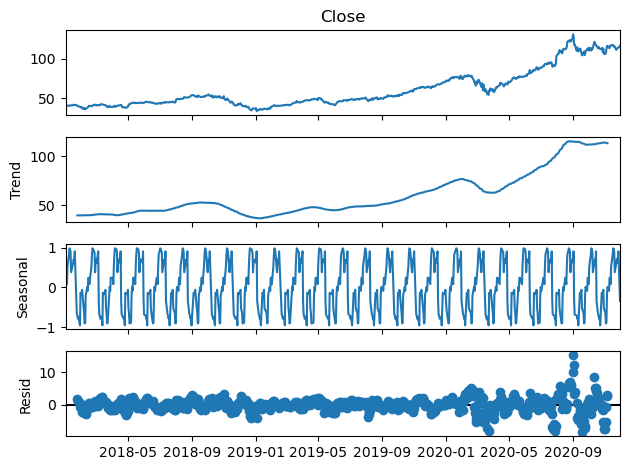

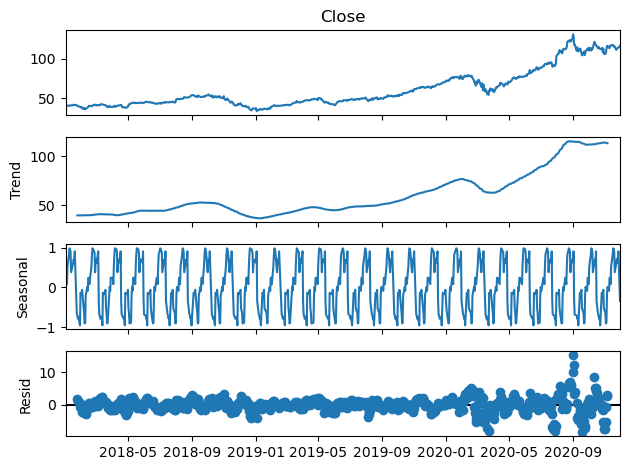

In [573]:
# Seasonal Decomposition Plots for Revenue Data
# Multiplicative model type, with daily seasonality (365 days)
decomp = seasonal_decompose(series_train, model='additive', period=30)  # período aproximado de um mês
decomp.plot()

### Decomposition
* decomposition, seasonal_decompose(time_series)
* trend, decomposition.trend
* seasonal, decomposition.seasonal
* random, decomposition.resid

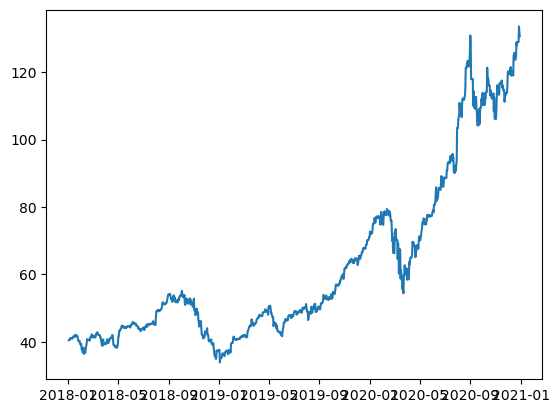

In [237]:
# Time series visualization
plt.plot(time_series)

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.


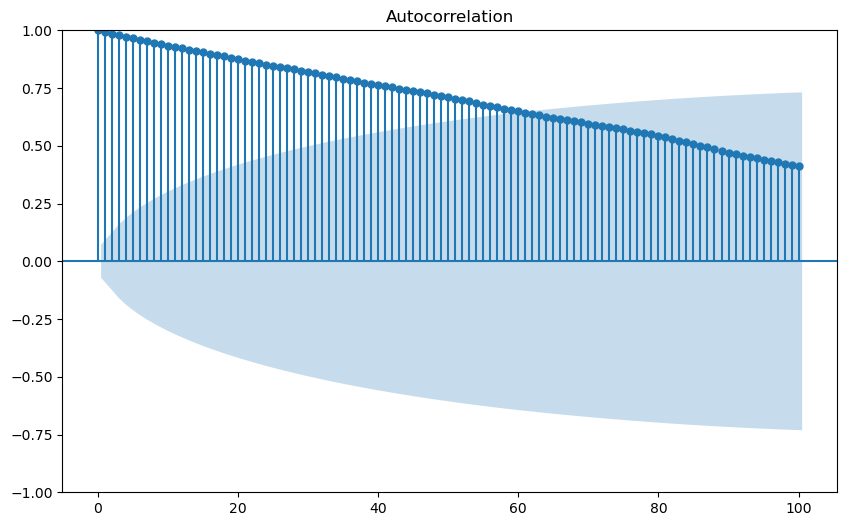

In [239]:
# Plot the autocorrelation (ACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(time_series['Close'], lags = 100, ax = ax)
plt.show()

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

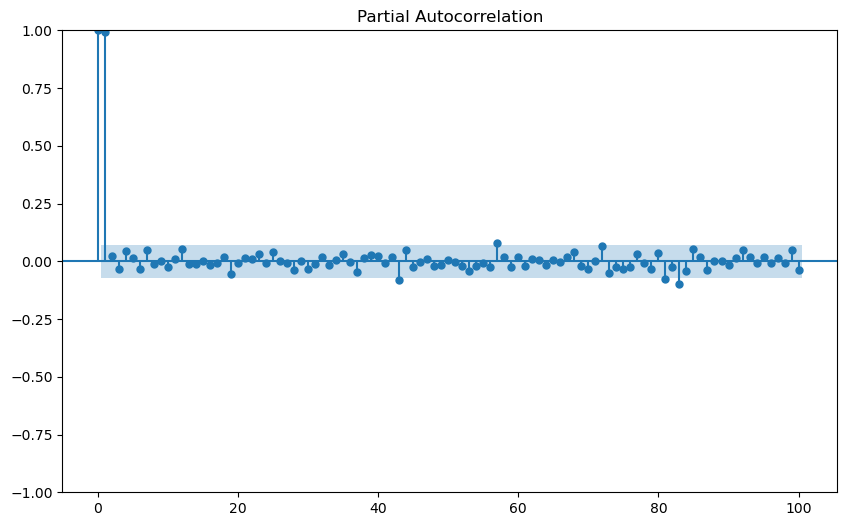

In [241]:
# Plot the partial autocorrelation (PACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df2['Close'], lags = 100, ax = ax)
plt.show()

In [244]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
# 'result' contains the test statistic and the p-value.
result = adfuller(df2.Close)
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")


p-value: 0.996023
Evidence suggests that the time series is not stationary.


In [557]:
from pmdarima import auto_arima

model = auto_arima(series_train, seasonal=True, m=12, error_action='ignore', suppress_warnings=True)
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  734
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 12)   Log Likelihood               -1357.051
Date:                              Sun, 11 May 2025   AIC                           2726.102
Time:                                      00:42:53   BIC                           2753.685
Sample:                                           0   HQIC                          2736.742
                                              - 734                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1782      0.082      2.176      0.030       0.018       0.339
ar.L1         -0.13

In [567]:
import numpy as np

# Previsões
horizons = [1, 3, 7]
for h in horizons:
    forecast = model.predict(n_periods=h)
    last_train_date = train_end
    future_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=h, freq='B')
    print(f"\nPrevisão para {h} dias úteis após {train_end.date()}:")
    for d, val in zip(future_dates, forecast):
        print(f"  {d.date()}: {val:.2f}")



Previsão para 1 dias úteis após 2020-11-30:
  2020-12-01: 116.08

Previsão para 3 dias úteis após 2020-11-30:
  2020-12-01: 116.08
  2020-12-02: 117.39
  2020-12-03: 116.62

Previsão para 7 dias úteis após 2020-11-30:
  2020-12-01: 116.08
  2020-12-02: 117.39
  2020-12-03: 116.62
  2020-12-04: 117.59
  2020-12-07: 117.66
  2020-12-08: 117.43
  2020-12-09: 116.62


C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\tecap\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predicti

In [ ]:
#########################